# メディア調査実習入門5 Vol.1
＜ID-POS分析＞


---



```
この授業では、小売様の協力を得て、リアルなID-POSデータを使って分析を行います。
小売業とはNDA（秘密保持契約）を締結した上でデータを提供していただいていますのでデータの取り扱いにはご注意ください。
```










## 1．データの準備


---





＜事前準備＞


*  Google DriveのMyDrive直下に「メディア調査実習入門」フォルダーをつくる
*  Gmailで届いた分析用のフォルダー（39d）の**ショートカット**を「メディア調査実習入門
」フォルダーに保存する
*  39dフォルダーから開いたこのファイルを、「ファイル」→「ドライブにコピーを保存」で**自分のColabドライブにコピー**する（忘れずに！）




### ドライブをマウントする

Google Drive上のファイルにアクセスするために必要です。

大学のメールアドレスを選択し、「許可」を押してください

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


####ライブラリーをインポートする


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### データの読み込み①

まずは1ヶ月間だけ読み込んでみよう！

CSVを読み込むには、pd.read_csv()　を使う 

読み込んだ結果をデータフレームとして設定する



```
データフレーム名 = pd.read_csv('ファイル名.csv')
```



In [3]:
# read_csvでファイルを指定する。　このままだとエラーになる

test = pd.read_csv('/content/drive/MyDrive/メディア調査実習入門/D39/D39_202004.txt')

UnicodeDecodeError: ignored

In [4]:
# 実行時にエラーが発生した場合、encoding = 'cp932' を入れてみると読み込める事が多い。
# 読み込んだものをtestという名前に設定する。

test = pd.read_csv('/content/drive/MyDrive/メディア調査実習入門/D39/D39_202004.txt', encoding = 'cp932')

In [5]:
# testの中身を確認する
test

# これを見るとヘッダー（表頭の項目名）がないことがわかる

,99999,0,0.1,20200430,0161,ＳＤ平野薬局,4902882032055,スプーン印 三温糖 １ｋｇ,1,食 品,11,加工食品,1101,調味料,110103,砂糖,1.1,238,475248
0,99999,0,0,20200430,161,ＳＤ平野薬局,4904001022596,日新製糖 きび砂糖 ７５０ｇ,1,食 品,11,加工食品,1101,調味料,110103,砂糖,1,298,475191
1,0048da379d5f02120f2fc4af737fead7,1988,1,20200430,161,ＳＤ平野薬局,4902882035247,スプーン印 グラニュー糖 １０００ｇ,1,食 品,11,加工食品,1101,調味料,110103,砂糖,1,238,475441
2,0048da379d5f02120f2fc4af737fead7,1988,1,20200430,161,ＳＤ平野薬局,4902882030105,スプーン印 上白糖 １ｋｇ,1,食 品,11,加工食品,1101,調味料,110103,砂糖,1,188,475441
3,5f590fd0fc171a322324a76f3f509ed1,1985,1,20200430,161,ＳＤ平野薬局,4949817000192,シュアナチュラル さとうきびの詩 ３００ｇ,1,食 品,11,加工食品,1101,調味料,110103,砂糖,1,250,798118
4,ca4255242601e704609c45fbc15db40e,1952,2,20200430,161,ＳＤ平野薬局,4902882030105,スプーン印 上白糖 １ｋｇ,1,食 品,11,加工食品,1101,調味料,110103,砂糖,1,171,797891
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
819689,205a9278410b25b4036cda71672b1ff7,1947,2,20200430,161,ＳＤ平野薬局,2800000000028,ご相談ポイント（調剤）,9,不明,99,不明,9999,不明,999999,不明,1,0,57091
819690,205a9278410b25b4036cda71672b1ff7,1947,2,20200430,161,ＳＤ平野薬局,2080010000007,一部負担金ＮＯＮＰＬＵ用,9,不明,99,不明,9999,不明,999999,不明,1,1740,57086
819691,205a9278410b25b4036cda71672b1ff7,1947,2,20200430,161,ＳＤ平野薬局,2080010000007,一部負担金ＮＯＮＰＬＵ用,9,不明,99,不明,9999,不明,999999,不明,1,390,57091
819692,248da0043f5005a4f47b3eace254d015,1949,2,20200430,161,ＳＤ平野薬局,2800000000066,エコポイント,9,不明,99,不明,9999,不明,999999,不明,1,0,475311


項目名を設定する。（各項目は、提供元に確認している）

In [7]:
# 項目名称を予め設定しておく
# 項目名は、シングルクォーテーション（またはダブルクォーテーション）で括る。

col_name = ['顧客ID', '生年', '性別', '購入日', '店舗CD', '店舗名', 'JAN', '商品名', 
        '大分類CD', '大分類名', '中分類CD', '中分類名','小分類CD', '小分類名','品目CD', '品目名','個数', '金額', 'レシート']

In [15]:
# 読み込む時にnames= で項目名を設定すると、ヘッダーに表示される
test1 = pd.read_csv('/content/drive/MyDrive/メディア調査実習入門/D39/D39_202004.txt', names = col_name, encoding = 'cp932')
test1

#このような表形式のものをデータフレームと呼ぶ

,顧客ID,生年,性別,購入日,店舗CD,店舗名,JAN,商品名,大分類CD,大分類名,中分類CD,中分類名,小分類CD,小分類名,品目CD,品目名,個数,金額,レシート
0,99999,0,0,20200430,161,ＳＤ平野薬局,4902882032055,スプーン印 三温糖 １ｋｇ,1,食 品,11,加工食品,1101,調味料,110103,砂糖,1,238,475248
1,99999,0,0,20200430,161,ＳＤ平野薬局,4904001022596,日新製糖 きび砂糖 ７５０ｇ,1,食 品,11,加工食品,1101,調味料,110103,砂糖,1,298,475191
2,0048da379d5f02120f2fc4af737fead7,1988,1,20200430,161,ＳＤ平野薬局,4902882035247,スプーン印 グラニュー糖 １０００ｇ,1,食 品,11,加工食品,1101,調味料,110103,砂糖,1,238,475441
3,0048da379d5f02120f2fc4af737fead7,1988,1,20200430,161,ＳＤ平野薬局,4902882030105,スプーン印 上白糖 １ｋｇ,1,食 品,11,加工食品,1101,調味料,110103,砂糖,1,188,475441
4,5f590fd0fc171a322324a76f3f509ed1,1985,1,20200430,161,ＳＤ平野薬局,4949817000192,シュアナチュラル さとうきびの詩 ３００ｇ,1,食 品,11,加工食品,1101,調味料,110103,砂糖,1,250,798118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
819690,205a9278410b25b4036cda71672b1ff7,1947,2,20200430,161,ＳＤ平野薬局,2800000000028,ご相談ポイント（調剤）,9,不明,99,不明,9999,不明,999999,不明,1,0,57091
819691,205a9278410b25b4036cda71672b1ff7,1947,2,20200430,161,ＳＤ平野薬局,2080010000007,一部負担金ＮＯＮＰＬＵ用,9,不明,99,不明,9999,不明,999999,不明,1,1740,57086
819692,205a9278410b25b4036cda71672b1ff7,1947,2,20200430,161,ＳＤ平野薬局,2080010000007,一部負担金ＮＯＮＰＬＵ用,9,不明,99,不明,9999,不明,999999,不明,1,390,57091
819693,248da0043f5005a4f47b3eace254d015,1949,2,20200430,161,ＳＤ平野薬局,2800000000066,エコポイント,9,不明,99,不明,9999,不明,999999,不明,1,0,475311


1ヶ月分のレコード件数を確認してみる

In [9]:
# レコード件数を確認する時にはshapeを使う
test1.shape

(819695, 19)

1ヶ月間で約82万レコードあることがわかる。20年4月は、縦819,695レコード×横19項目

ちなみに、24ヶ月を全てつなげると1726万レコードになる。

1726万レコードのビッグデータをgoogle colabで分析処理を行うとメモリークラッシュが発生してしまい残念ながら授業にならない。

従って、今回の授業では以下の条件で絞り込んだデータを用いて分析を進めることとする。
* 6店舗→4店舗
* ID-POSのみ（顧客IDが99999を除く）

### データの読み込み②

4店舗・ID-POSのみを抽出したCSVを読み込む



2020年4月〜2022年3月までの2年分のデータを2つのファイルに分けて保管している
* 2020/4/1-2021/3/31→39d2004-2103.csv
* 2021/4/1-2022/3/31→39d2104-2203.csv


In [11]:
# 1年ごとの2つのファイルをそれぞれ読み込む
# フォルダー名など複雑なものは変数にしておくと、後で使いやすい

folder = '/content/drive/MyDrive/メディア調査実習入門/D39/'

df1 = pd.read_csv(folder + '39d2004-2103.csv', index_col = 0)
df2 = pd.read_csv(folder + '39d2104-2203.csv', index_col = 0)

# index_col=0は気にしない。


それぞれを確認してみる

```
a = '立教大学'
b = '社会学部'
a+b

# '立教大学社会学部'
```



In [12]:
df1

,顧客ID,生年,性別,購入日,店舗名,JAN,商品名,大分類名,中分類名,小分類名,品目名,個数,金額,レシート
0,f8803b13b997335adc45ca235a5a2a00,1973,2,2020-04-30,ＳＤ一枝薬局,4902882032055,スプーン印 三温糖 １ｋｇ,食 品,加工食品,調味料,砂糖,1,238,20200430_153_84078
1,cd8446e044d999abf66309fd607b4140,1937,2,2020-04-30,ＳＤ一枝薬局,4902882320718,スプーン印 ティータイムメイト ３ｇ×６０,食 品,加工食品,調味料,砂糖,1,99,20200430_153_831202
2,fd428f6f3d1bf40a6b1dc6db1722c6fc,1979,2,2020-04-30,ＳＤ一枝薬局,4902882212617,スプーン印 角砂糖 袋 ４５０ｇ,食 品,加工食品,調味料,砂糖,1,198,20200430_153_831205
3,81462391190510ec354f3dfee05db633,1965,2,2020-04-30,ＳＤ一枝薬局,4902882554342,スプーン印 国産さとうきび糖 ６００ｇ,食 品,加工食品,調味料,砂糖,2,458,20200430_153_84249
4,79d6ecf83946f80c78021d0d379f70b5,1948,2,2020-04-30,ＳＤ一枝薬局,4902788222079,メイホウ 氷砂糖 １５０ｇ,食 品,加工食品,調味料,砂糖,13,1277,20200430_153_935277
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4447464,4273dc3aaacc179d5ed26d42af710c21,1931,2,2021-03-31,ＳＤ一枝薬局,3907210403010,果実【３７９円】,不明,不明,不明,不明,1,378,20210331_153_1018712
4447465,4a7da6f2e6d27b53c562a914ae00379e,1975,2,2021-03-31,ＳＤ一枝薬局,3907210400569,野菜【９９円】,不明,不明,不明,不明,1,99,20210331_153_1018731
4447466,64b84eebf0c92eaf465ce8e8593752aa,1961,2,2021-03-31,ＳＤ一枝薬局,3907210402044,野菜【１３９円】,不明,不明,不明,不明,1,138,20210331_153_1018743
4447467,64b84eebf0c92eaf465ce8e8593752aa,1961,2,2021-03-31,ＳＤ一枝薬局,3907210403010,果実【３７９円】,不明,不明,不明,不明,2,756,20210331_153_1018743


In [13]:
df2

,顧客ID,生年,性別,購入日,店舗名,JAN,商品名,大分類名,中分類名,小分類名,品目名,個数,金額,レシート
0,bd6fd4c5d437c277e8e529fde4052491,1955,2,2021-04-30,ＳＤ一枝薬局,4902581022524,フンドーキン あまくておいしい醤油 ２００ｍｌ,食 品,加工食品,調味料,醤油,1,228,20210430_153_1035915
1,99792bc3da7aaa4cfb3b1f2b02c1c26f,1959,2,2021-04-30,ＳＤ一枝薬局,4974507740096,チョーコー 特選 かけ醤油 瓶 ４００ｍｌ,食 品,加工食品,調味料,醤油,1,399,20210430_153_1035682
2,c6ecd0e35ab45f70c2dd7df569466198,1982,2,2021-04-30,ＳＤ一枝薬局,4902970102172,宮島 さしみ醤油 ８０ｍｌ,食 品,加工食品,調味料,醤油,1,118,20210430_153_312019
3,b4407467e52916cd6611b9d390844bac,1947,2,2021-04-30,ＳＤ一枝薬局,4571188510217,ナカマル 寿うまくち １Ｌ,食 品,加工食品,調味料,醤油,1,428,20210430_153_1035617
4,c0c0d0dda966893926a30e36e9f3b717,1958,2,2021-04-30,ＳＤ桜町薬局,4902581022524,フンドーキン あまくておいしい醤油 ２００ｍｌ,食 品,加工食品,調味料,醤油,1,228,20210430_143_807922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272161,ae85c8cf2759f5dd3a8b0cb3c6f0255c,1956,2,2022-03-31,ＳＤ一枝薬局,3907210403232,野菜【１９９円】,不明,不明,不明,不明,1,198,20220331_153_425319
4272162,4f6b65af5ac59781cee9b5c1295fe6cf,1981,2,2022-03-31,ＳＤ一枝薬局,3907210402006,野菜【５９円】,不明,不明,不明,不明,1,59,20220331_153_425335
4272163,e95f1efb3e711e560c5c0613d49b422b,1941,2,2022-03-31,ＳＤ一枝薬局,3907210400569,野菜【９９円】,不明,不明,不明,不明,2,196,20220331_153_425268
4272164,7d57e455207c55cef41d54702cc9df6f,1934,2,2022-03-31,ＳＤ一枝薬局,3907210403263,果実【２９９円】,不明,不明,不明,不明,1,298,20220331_153_425339


まずは1年分で分析してみよう！

df = df2 のようにしているのは、dfとすることで、分析対象がdf1でもdf2でもその後の処理をdfで統一できるから

In [14]:
# df2をdfと名づける　
# （= はイコールではなく代入するの意味） 
df = df2

2年分のデータをつなげるときは、concatを使う

ただし、2年分のデータをつなげると、クラッシュするリスクが高くなるので、分析視点を絞ってからつなげることを推奨します

今週の授業は１年間のデータで行います

In [ ]:
# 2期間のデータフレームを結合する場合は、concatを使う。　ここではコメント行に設定して処理しない
# df = pd.concat([df1, df2], ignore_index = True)

### df(データフレーム)を確認

In [16]:
# .head() で最初の5行を表示する

df.head()

# ()に何も入れないと最初の5行。　数字を入れると入れた数分だけ表示される。
# 最後の5行を出すときは、.tail() を使う


,顧客ID,生年,性別,購入日,店舗名,JAN,商品名,大分類名,中分類名,小分類名,品目名,個数,金額,レシート
0,bd6fd4c5d437c277e8e529fde4052491,1955,2,2021-04-30,ＳＤ一枝薬局,4902581022524,フンドーキン あまくておいしい醤油 ２００ｍｌ,食 品,加工食品,調味料,醤油,1,228,20210430_153_1035915
1,99792bc3da7aaa4cfb3b1f2b02c1c26f,1959,2,2021-04-30,ＳＤ一枝薬局,4974507740096,チョーコー 特選 かけ醤油 瓶 ４００ｍｌ,食 品,加工食品,調味料,醤油,1,399,20210430_153_1035682
2,c6ecd0e35ab45f70c2dd7df569466198,1982,2,2021-04-30,ＳＤ一枝薬局,4902970102172,宮島 さしみ醤油 ８０ｍｌ,食 品,加工食品,調味料,醤油,1,118,20210430_153_312019
3,b4407467e52916cd6611b9d390844bac,1947,2,2021-04-30,ＳＤ一枝薬局,4571188510217,ナカマル 寿うまくち １Ｌ,食 品,加工食品,調味料,醤油,1,428,20210430_153_1035617
4,c0c0d0dda966893926a30e36e9f3b717,1958,2,2021-04-30,ＳＤ桜町薬局,4902581022524,フンドーキン あまくておいしい醤油 ２００ｍｌ,食 品,加工食品,調味料,醤油,1,228,20210430_143_807922


In [17]:
# レコード数を確認する
df.shape

#1年分だと400万レコード超、項目数は14列ある
#2年分だと872万レコード

(4272166, 14)

<練習>　head()  tail() を使って、表示をさせてみよう


### ★データの準備＜まとめ＞

覚えるべきコマンド

* read_csv('ファイル名')
* データフレーム名.head()
* データフレーム名.shape

## ２. データの前処理


---


データの前処理は、データの中身を確認し分析しやすいようにデータを整えるために必要です。

### データ型の確認

In [ ]:
# .info()で、各項目のデータ型を確認する。
#　int64:整数, object:文字 float64:小数

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4272166 entries, 0 to 4272165
Data columns (total 14 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   顧客ID    object
 1   生年      int64 
 2   性別      int64 
 3   購入日     object
 4   店舗名     object
 5   JAN     int64 
 6   商品名     object
 7   大分類名    object
 8   中分類名    object
 9   小分類名    object
 10  品目名     object
 11  個数      int64 
 12  金額      int64 
 13  レシート    object
dtypes: int64(5), object(9)
memory usage: 488.9+ MB


### データ型を変える

性別・JANは文字型　  購入日は日付形式にする

In [21]:
# astypeでデータ型を変更する
df['性別'] = df['性別'].astype(str) #str 文字型
df['JAN'] = df['JAN'].astype(str)

# 日付をdatetime型に変換する
df['購入日'] = pd.to_datetime(df['購入日'])

# 日付別集計のための月のみのフィールドを追加する。
df['年'] = df['購入日'].dt.year
df['月'] = df['購入日'].dt.month

df.head(3)


,顧客ID,生年,性別,購入日,店舗名,JAN,商品名,大分類名,中分類名,小分類名,品目名,個数,金額,レシート,年,月
0,bd6fd4c5d437c277e8e529fde4052491,1955,2,2021-04-30,ＳＤ一枝薬局,4902581022524,フンドーキン あまくておいしい醤油 ２００ｍｌ,食 品,加工食品,調味料,醤油,1,228,20210430_153_1035915,2021,4
1,99792bc3da7aaa4cfb3b1f2b02c1c26f,1959,2,2021-04-30,ＳＤ一枝薬局,4974507740096,チョーコー 特選 かけ醤油 瓶 ４００ｍｌ,食 品,加工食品,調味料,醤油,1,399,20210430_153_1035682,2021,4
2,c6ecd0e35ab45f70c2dd7df569466198,1982,2,2021-04-30,ＳＤ一枝薬局,4902970102172,宮島 さしみ醤油 ８０ｍｌ,食 品,加工食品,調味料,醤油,1,118,20210430_153_312019,2021,4


In [22]:
# データ型が変更されたことを確認する
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4272166 entries, 0 to 4272165
Data columns (total 16 columns):
 #   Column  Dtype         
---  ------  -----         
 0   顧客ID    object        
 1   生年      int64         
 2   性別      object        
 3   購入日     datetime64[ns]
 4   店舗名     object        
 5   JAN     object        
 6   商品名     object        
 7   大分類名    object        
 8   中分類名    object        
 9   小分類名    object        
 10  品目名     object        
 11  個数      int64         
 12  金額      int64         
 13  レシート    object        
 14  年       int64         
 15  月       int64         
dtypes: datetime64[ns](1), int64(5), object(10)
memory usage: 554.1+ MB


### 年齢・年代区分

In [23]:
# 生年だけ抜き出してみる
df['生年']

# ただし、これだと400万行以上あるので、よくわからない

0          1955
1          1959
2          1982
3          1947
4          1958
           ... 
4272161    1956
4272162    1981
4272163    1941
4272164    1934
4272165    1983
Name: 生年, Length: 4272166, dtype: int64

In [24]:
# ユニークに出してみる .unique()を使う
df['生年'].unique()

array([1955, 1959, 1982, 1947, 1958, 1986, 1945, 1983, 1992, 1954, 1951,
       1973, 1942, 1944, 1974, 1971, 1988, 1901, 1950, 1999, 1976, 1949,
       1975, 1980, 1929, 1966, 1979, 1940, 1969, 1970, 1989, 1939, 1965,
       1990, 1977, 1968, 1998, 1953, 1946, 1800, 1935, 1964, 1948, 1978,
       1952, 1981, 1933, 1943, 1985, 1996, 1967, 1984, 1930, 1995, 1941,
       1961, 1991, 1994, 1937, 1962, 1987, 1963, 1956, 1934, 1993, 1972,
       1936, 2002, 2001, 1960, 1938, 1957, 1932, 1931, 1900, 2005, 1997,
       2000, 1927, 2007, 1924, 2003, 1928, 2004, 1920, 2006, 1926, 2011,
       1921, 2008, 1922, 2009, 1925, 2032, 1915, 2017, 1923, 2010, 1919,
       1917, 2012, 2014, 2013, 1916, 2015])

In [25]:
# 並び順が飛び飛びなので昇順に並べてみる。　numpyのソートを使う。　np.sort()で括る
np.sort(df['生年'].unique())

# 1800年生まれとか2032年生まれとか、過去や未来からやってきたような人がいる

array([1800, 1900, 1901, 1915, 1916, 1917, 1919, 1920, 1921, 1922, 1923,
       1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934,
       1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945,
       1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956,
       1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967,
       1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978,
       1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989,
       1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2017, 2032])

<練習>　大分類名・中分類名などを抜き出して、uniqueを使って内容を確認をしてみよう

In [26]:
# <練習>

df['中分類名'].unique()


array(['加工食品', '菓子類', '飲料・酒類', '日用雑貨', '医薬品', '化粧品', '家庭用品', 'ＤＩＹ用品',
       'ペット用品', 'その他日用品', '文具・事務用品・情報文具', '玩具', '車両用品', '家電', '衣料・衣服',
       '寝具・寝装品', '身の回り品', '靴・履物', '生鮮食品', 'その他食品', '有料レジ袋', '情報機器',
       '時計・メガネ', '書籍', 'スポーツ用品', '不明', 'その他文化用品'], dtype=object)

#### 年齢の項目をつくる

In [27]:
# 今年（2022年）から生年を引いて年齢を計算する。
# 計算した結果を’年齢’として新たに項目をつくる

df['年齢'] = 2022 - df['生年']

df.head()

,顧客ID,生年,性別,購入日,店舗名,JAN,商品名,大分類名,中分類名,小分類名,品目名,個数,金額,レシート,年,月,年齢
0,bd6fd4c5d437c277e8e529fde4052491,1955,2,2021-04-30,ＳＤ一枝薬局,4902581022524,フンドーキン あまくておいしい醤油 ２００ｍｌ,食 品,加工食品,調味料,醤油,1,228,20210430_153_1035915,2021,4,67
1,99792bc3da7aaa4cfb3b1f2b02c1c26f,1959,2,2021-04-30,ＳＤ一枝薬局,4974507740096,チョーコー 特選 かけ醤油 瓶 ４００ｍｌ,食 品,加工食品,調味料,醤油,1,399,20210430_153_1035682,2021,4,63
2,c6ecd0e35ab45f70c2dd7df569466198,1982,2,2021-04-30,ＳＤ一枝薬局,4902970102172,宮島 さしみ醤油 ８０ｍｌ,食 品,加工食品,調味料,醤油,1,118,20210430_153_312019,2021,4,40
3,b4407467e52916cd6611b9d390844bac,1947,2,2021-04-30,ＳＤ一枝薬局,4571188510217,ナカマル 寿うまくち １Ｌ,食 品,加工食品,調味料,醤油,1,428,20210430_153_1035617,2021,4,75
4,c0c0d0dda966893926a30e36e9f3b717,1958,2,2021-04-30,ＳＤ桜町薬局,4902581022524,フンドーキン あまくておいしい醤油 ２００ｍｌ,食 品,加工食品,調味料,醤油,1,228,20210430_143_807922,2021,4,64


In [28]:
# 過去や未来から来た人の年齢を確認する

np.sort(df['年齢'].unique())

array([-10,   5,   7,   8,   9,  10,  11,  12,  13,  14,  15,  16,  17,
        18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,  29,  30,
        31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,  43,
        44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,  56,
        57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,
        70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,
        83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,
        96,  97,  98,  99, 100, 101, 102, 103, 105, 106, 107, 121, 122,
       222])

#### 年齢異常値の人のデータを修正する＜難易度：中＞

In [29]:
# 10歳〜99歳までを対象とし、それ以外（10歳未満、100歳以上）は一旦199とする。
# maskで範囲を設定して置き換えができる。　

df['年齢'] = df['年齢'].mask(df['年齢'] >= 100, 199)
df['年齢'] = df['年齢'].mask(df['年齢'] < 10, 199)

# 下のようにまとめて書くこともできる
# df['年齢'] = df['年齢'].mask((df['年齢'] >= 100) | (df['年齢'] < 10), 199)


In [30]:
# 置き換わったかどうかを確認してみる
np.sort(df['年齢'].unique())

array([ 10,  11,  12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,
        23,  24,  25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,
        36,  37,  38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,
        49,  50,  51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,
        62,  63,  64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,
        75,  76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,
        88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 199])

#### 10歳刻みで年代区分をつくる＜難易度：中＞

In [31]:
# 10歳刻みで年代区分をつくる

age_label = ['10代', '20代', '30代', '40代', '50代', '60代', '70代', '80代', '90代', '不明']

df['年代区分'] = pd.cut(df['年齢'],[10,20,30,40,50,60,70,80,90,100,200], right = False, labels = age_label)

df.head()

,顧客ID,生年,性別,購入日,店舗名,JAN,商品名,大分類名,中分類名,小分類名,品目名,個数,金額,レシート,年,月,年齢,年代区分
0,bd6fd4c5d437c277e8e529fde4052491,1955,2,2021-04-30,ＳＤ一枝薬局,4902581022524,フンドーキン あまくておいしい醤油 ２００ｍｌ,食 品,加工食品,調味料,醤油,1,228,20210430_153_1035915,2021,4,67,60代
1,99792bc3da7aaa4cfb3b1f2b02c1c26f,1959,2,2021-04-30,ＳＤ一枝薬局,4974507740096,チョーコー 特選 かけ醤油 瓶 ４００ｍｌ,食 品,加工食品,調味料,醤油,1,399,20210430_153_1035682,2021,4,63,60代
2,c6ecd0e35ab45f70c2dd7df569466198,1982,2,2021-04-30,ＳＤ一枝薬局,4902970102172,宮島 さしみ醤油 ８０ｍｌ,食 品,加工食品,調味料,醤油,1,118,20210430_153_312019,2021,4,40,40代
3,b4407467e52916cd6611b9d390844bac,1947,2,2021-04-30,ＳＤ一枝薬局,4571188510217,ナカマル 寿うまくち １Ｌ,食 品,加工食品,調味料,醤油,1,428,20210430_153_1035617,2021,4,75,70代
4,c0c0d0dda966893926a30e36e9f3b717,1958,2,2021-04-30,ＳＤ桜町薬局,4902581022524,フンドーキン あまくておいしい醤油 ２００ｍｌ,食 品,加工食品,調味料,醤油,1,228,20210430_143_807922,2021,4,64,60代


年代別の人数（顧客ID）を算出する

後ほど集計のためのgroupbyをやるが、一旦ここで動かしてみる

In [32]:
# groupbyで年代別の集計ができる。 sum()は足し算

df.groupby('年代区分').sum()

#個数・金額の他に生年なども集計されている。
#文字列ではない項目が計算対象となる。（性別は文字列に置き換えたので、ここには出てこない）

,生年,個数,金額,年,月,年齢
年代区分,,,,,,
10代,20454516,11446,3396253,20625071,67404,177972
20代,487538534,271517,77284187,493424476,1592546,6072106
30代,1204620754,702960,210620040,1225560992,4012161,21404792
40代,1697303590,1014136,312618649,1735093593,5677572,38447936
50代,1502455622,905094,321259240,1543296549,5048946,41426302
60代,1414886759,866600,315283824,1461044952,4761464,46709875
70代,1173499486,730856,247962466,1217631961,3971633,44591732
80代,559116371,337793,104355024,583047230,1909801,24153793
90代,69609879,42378,14362358,72907365,238389,3325683


### 性別のコードを男性・女性に置き換える

In [33]:
df['性別'].unique()

array(['2', '1', '0'], dtype=object)

In [34]:
# groupbyの後のnunique()で、ユニーク人数をカウントできる。
df.groupby('性別').nunique()

,顧客ID,生年,購入日,店舗名,JAN,商品名,大分類名,中分類名,小分類名,品目名,個数,金額,レシート,年,月,年齢,年代区分
性別,,,,,,,,,,,,,,,,,
0,153,8,365,4,7129,7091,7,24,127,498,23,1825,3796,2,12,8,6
1,11491,95,365,4,28347,28132,7,27,174,682,59,4878,175308,2,12,89,10
2,41010,103,365,4,38313,37903,7,27,185,708,75,7573,672013,2,12,91,10


In [35]:
# groupbyの後のnunique()に項目名を指定することで、項目を絞ることができる。
df.groupby('性別').nunique()['顧客ID']

#データフレームの形できれいに出す方法は後ほど！

性別
0      153
1    11491
2    41010
Name: 顧客ID, dtype: int64

#### データの内容を書き換える

In [37]:
# replace で数字で出ている性別データを男性・女性のように書き換える
df = df.replace({'性別': {'0':'不明', '1':'男性', '2':'女性'}})

df.head()

,顧客ID,生年,性別,購入日,店舗名,JAN,商品名,大分類名,中分類名,小分類名,品目名,個数,金額,レシート,年,月,年齢,年代区分
0,bd6fd4c5d437c277e8e529fde4052491,1955,女性,2021-04-30,ＳＤ一枝薬局,4902581022524,フンドーキン あまくておいしい醤油 ２００ｍｌ,食 品,加工食品,調味料,醤油,1,228,20210430_153_1035915,2021,4,67,60代
1,99792bc3da7aaa4cfb3b1f2b02c1c26f,1959,女性,2021-04-30,ＳＤ一枝薬局,4974507740096,チョーコー 特選 かけ醤油 瓶 ４００ｍｌ,食 品,加工食品,調味料,醤油,1,399,20210430_153_1035682,2021,4,63,60代
2,c6ecd0e35ab45f70c2dd7df569466198,1982,女性,2021-04-30,ＳＤ一枝薬局,4902970102172,宮島 さしみ醤油 ８０ｍｌ,食 品,加工食品,調味料,醤油,1,118,20210430_153_312019,2021,4,40,40代
3,b4407467e52916cd6611b9d390844bac,1947,女性,2021-04-30,ＳＤ一枝薬局,4571188510217,ナカマル 寿うまくち １Ｌ,食 品,加工食品,調味料,醤油,1,428,20210430_153_1035617,2021,4,75,70代
4,c0c0d0dda966893926a30e36e9f3b717,1958,女性,2021-04-30,ＳＤ桜町薬局,4902581022524,フンドーキン あまくておいしい醤油 ２００ｍｌ,食 品,加工食品,調味料,醤油,1,228,20210430_143_807922,2021,4,64,60代


### 他の項目も確認しておく

店舗名の確認

In [38]:
df['店舗名'].unique()


array(['ＳＤ一枝薬局', 'ＳＤ桜町薬局', 'ＳＤ千代ヶ崎', 'ＳＤ朝日ヶ丘店'], dtype=object)

大分類の確認

In [39]:
df['大分類名'].unique()


array(['食\u3000品', '日用品', '文化用品', '耐久消費財', '衣料・身回り品', '有料レジ袋', '不明'],
      dtype=object)

In [40]:
# 「食\u3000品」という大分類がでてくるので、データの中身を確認してみる
df['大分類名']

0          食　品
1          食　品
2          食　品
3          食　品
4          食　品
          ... 
4272161     不明
4272162     不明
4272163     不明
4272164     不明
4272165     不明
Name: 大分類名, Length: 4272166, dtype: object

In [41]:
# 食品が食\u3000品となっているのは、半角スペースが入っているから。
# \u3000を取り除く

#replaceで置き換える
df['大分類名'] = df['大分類名'].replace('食\u3000品', '食品')

df['大分類名'].unique()

array(['食品', '日用品', '文化用品', '耐久消費財', '衣料・身回り品', '有料レジ袋', '不明'],
      dtype=object)

中分類の確認

In [45]:
df['中分類名'].unique()

array(['加工食品', '菓子類', '飲料・酒類', '日用雑貨', '医薬品', '化粧品', '家庭用品', 'ＤＩＹ用品',
       'ペット用品', 'その他日用品', '文具・事務用品・情報文具', '玩具', '車両用品', '家電', '衣料・衣服',
       '寝具・寝装品', '身の回り品', '靴・履物', '生鮮食品', 'その他食品', '有料レジ袋', '情報機器',
       '時計・メガネ', '書籍', 'スポーツ用品', '不明', 'その他文化用品'], dtype=object)

小分類の確認

In [46]:
df['小分類名'].unique()

array(['調味料', '食用油', '調理品', 'スープ', '冷凍食品', '粉類', 'ホームメイキング材料', '麺類',
       '加工肉類', '練り製品', '漬物・佃煮', '農産乾物', '加工水産', '菓子', 'アイスクリーム類', '嗜好飲料',
       '果実飲料', '清涼飲料', 'アルコール飲料', '口中衛生用品', '介護用品・用具', '衛生医療用品・用具',
       '衣料用洗剤類', '家庭用つや出し・ワックス剤', '殺虫剤', '精神神経用薬', '呼吸器官用薬', '循環器官用薬',
       '消化器官用薬', 'アレルギー用薬', '外皮用薬', '女性用薬', 'ビタミン主薬製剤', 'ビタミン含有保健薬',
       'その他の保健薬', '皮ふ関連（指定医薬部外品）', '滋養強壮関連（指定医薬部外品）', 'その他の医薬品',
       'メイクアップ化粧品', 'ボディケア化粧品', 'フレグランス', 'インバスヘアケア', '男性化粧品', '化粧小物',
       'その他化粧品', '掃除用品', '台所用品', 'リビング用品', 'ガス・水道部品', '園芸用品', '小鳥',
       'その他日用品', '事務用品', '筆記用具', '電子文具', '事務用機器', '一般ゲーム', 'ミニカー', '小物玩具',
       '洗車、補修用品', '消耗部品', '肌着・靴下', 'カバー・シーツ', '婦人服飾', '袋物', '装身具',
       'その他の靴', '台所・食器用洗剤類', '乳製品', '衛生紙用品・用具', '歯科口腔用薬', '水物', 'ドリンク剤',
       '農産', '乳飲料', '珍味', 'タオル製品', '住居用洗剤類', 'パン・シリアル類', '基礎化粧品', '猫',
       '缶詰', '消耗家電', '芳香・消臭剤', '理美容用品', 'その他日用雑貨', 'その他家庭用品',
       '目・鼻・口・のど関連（指定医薬部外品）', '胃腸関連（指定医薬部外品）', '公衆衛生用薬', '健康食品', '紙製品',
       'メンズ（合皮）', 'メンズ', 

品目の確認

In [47]:
df['品目名'].unique()

# 大分類名と同じように \u3000があるが、そのままにしておく

array(['醤油', '砂糖', 'みりん風調味料', '香辛料（からし・わさび以外）', 'サラダ油・天ぷら油', 'シチュールー',
       'その他調理品', 'インスタントスープ', '冷凍水産素材', '冷凍ピザ・グラタン類', 'きな粉', 'プレミックス',
       '蜂蜜', '水飴', 'その他ホームメイキング材料', 'スパゲッティ', 'マカロニ', '魚肉ソーセージ',
       'その他加工肉類', 'はんぺん', 'いりぬか・漬け物の素', 'ゴマ', '干し椎茸', 'わかめ', '昆布', '煮干',
       'その他菓子', 'ファミリーアイス', 'その他嗜好飲料', 'トマトジュース', 'その他果実飲料', '炭酸フレーバー',
       '紅茶ドリンク', 'その他茶ドリンク', '焼酎（甲類）', 'ビール', '洗口液', '口中清涼剤', '大人用衛生用品',
       'その他介護用品・用具', '綿棒', '包帯', '救急絆創膏', 'サポーター', '衣料用処理剤', '住居用ワックス',
       '靴墨・靴用クリーム', 'その他殺虫剤', '解熱鎮痛薬', 'かぜ薬', '小児鎮静薬（小児五疳薬）',
       'その他の呼吸器官用薬', '高コレステロール低下薬', '胃腸薬', '胃腸鎮痛鎮痙薬', '駆虫薬', '内服アレルギー用薬',
       '化膿性皮膚疾患用薬', '外用湿疹・皮膚炎用薬', 'かゆみ・虫さされ用薬', 'シラミ駆除用薬', 'その他の外皮用薬',
       '膣カンジタ用薬', 'ビタミンＥＣ主薬製剤', 'ビタミンＢ１Ｂ６Ｂ１２主薬製剤',
       'その他のビタミン含有保健薬（強肝解毒剤など）', '薬用酒', 'ひび・しもやけ・あかぎれ（部外品）', 'かさつき・あれ',
       'ビタミン含有の滋養強壮（部外品）', 'その他の医薬品', 'ネイルカラー', 'ＵＶケア', 'その他ボディケア化粧品',
       'コロン', 'ヘアトリートメント・パック', 'プレシェーブ・シェービング剤', '男性用洗顔料・パック',
       'フェイス用化粧用具', 'ネイル用化粧用具', 'その他化粧品

In [48]:
# .unique 項目名を表示
# .nunique 項目数を表示

df['品目名'].nunique()

712

### ★データの前処理＜まとめ＞

* データ型を確認する　.info()
* データ型を変更する
** 文字型に変更　.astype(str)
** 整数型に変更　.astype(int)
** 小数型に変更　.astype(float) 
* 新しい項目名をつくる　　df['年齢']　= 2022 - df['生年']



* ユニークに表示する　df['年齢'].unique()　
* 項目数を表示する　df['年齢'].nunique()　



## ＜ちょっとブレイク＞

コーギー・猫・カニを表示する

【ツール】　→　【設定】　→　【その他】





> 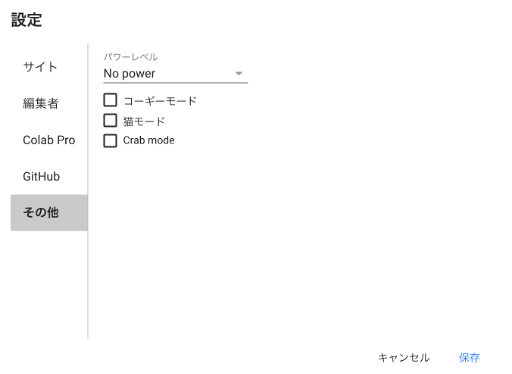

犬・猫・カニが現れる

> 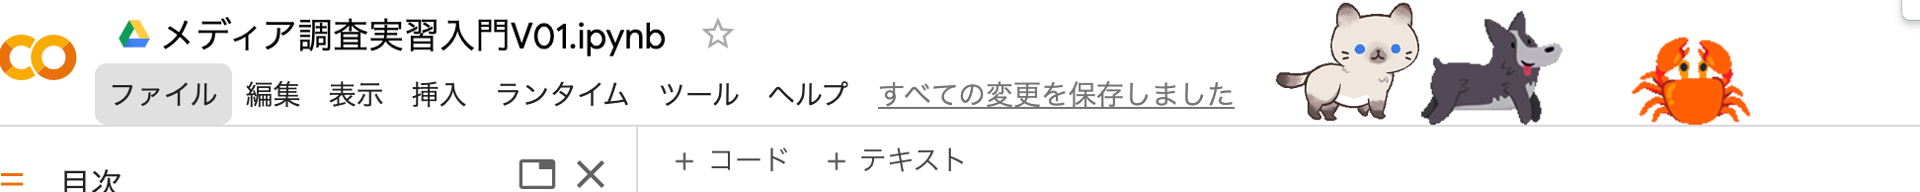

## ３. 分析

ここから本格的な分析パートに入ります

---



### 抽出

#### 関数（query）を使って抽出

中分類が菓子類のレコードを抽出する

In [49]:
# シングルクォーテーションとダブルクォーテーションの位置に注意

df.query('中分類名 == "菓子類"')


,顧客ID,生年,性別,購入日,店舗名,JAN,商品名,大分類名,中分類名,小分類名,品目名,個数,金額,レシート,年,月,年齢,年代区分
5494,cb96097d844a261cf2a9680c4a1b9bf6,1982,女性,2021-04-30,ＳＤ一枝薬局,4901551355990,クラシエ ねるねるねるね ぶどう味 ２３．５ｇ,食品,菓子類,菓子,その他菓子,1,118,20210430_153_1035973,2021,4,40,40代
5495,06df3b74121e7108a48ecbee0f85d264,1986,女性,2021-04-30,ＳＤ一枝薬局,4901551356096,カラフルピース にじいろつぶつぶランド ２８ｇ,食品,菓子類,菓子,その他菓子,1,179,20210430_153_1035897,2021,4,36,30代
5496,06df3b74121e7108a48ecbee0f85d264,1986,女性,2021-04-30,ＳＤ一枝薬局,4901551355433,ポッピンクッキン たのしいおまつりやさん ２４ｇ,食品,菓子類,菓子,その他菓子,1,198,20210430_153_1035897,2021,4,36,30代
5497,2aaacb637be82d43a958baef775e594c,1901,女性,2021-04-30,ＳＤ一枝薬局,4901551355594,クラシエ ポッピンクッキン ハンバーガー ２２ｇ,食品,菓子類,菓子,その他菓子,1,239,20210430_153_312229,2021,4,199,不明
5498,b2428cae7807ba4b32d5db092e7c0b06,1988,女性,2021-04-30,ＳＤ一枝薬局,4902472004103,橋本 可愛いくろぼう ７本,食品,菓子類,菓子,その他菓子,1,98,20210430_153_1035663,2021,4,34,30代
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4249234,a3b89baab65c1f3d22da82bc238457e8,1985,女性,2022-03-31,ＳＤ一枝薬局,4571157254340,オリヒロ ぷるんと蒟蒻ゼリー新グレープ ２０ｇ×６,食品,菓子類,デザート・ヨーグルト,デザート類,1,99,20220331_153_425313,2022,3,37,30代
4249236,a3b89baab65c1f3d22da82bc238457e8,1985,女性,2022-03-31,ＳＤ一枝薬局,4951595707767,フランソア 笑福みたらし,食品,菓子類,菓子,生菓子,2,278,20220331_153_425313,2022,3,37,30代
4249252,d3854ae8e3438edb03d5dc14c8a25ad6,1964,女性,2022-03-31,ＳＤ一枝薬局,4571157258249,オリヒロ ぷるんと蒟蒻カロリ－０白桃巨峰 １２個,食品,菓子類,デザート・ヨーグルト,デザート類,1,198,20220331_153_425321,2022,3,58,50代
4249259,d4173de9f48d8d08f759d135bf4b5359,1982,女性,2022-03-31,ＳＤ一枝薬局,49667080,オハヨー＿贅沢卵カスタード,食品,菓子類,デザート・ヨーグルト,デザート類,1,99,20220331_153_425337,2022,3,40,40代


このままでは保存されていないので、抽出したものをkashiという名前（データフレーム）で設定する

In [50]:
kashi = df.query('中分類名 == "菓子類"')

In [51]:
# kashiの中の小分類と品目名を出してみる
print(kashi['小分類名'].unique())
print()
print(kashi['品目名'].unique())

['菓子' 'アイスクリーム類' '珍味' 'デザート・ヨーグルト']

['その他菓子' 'ファミリーアイス' '半生菓子' '畜産珍味' '農産珍味' 'チュ－インガム' 'ビスケット・クッキ－' '水産珍味'
 '豆菓子' 'その他珍味' 'ヨーグルト' 'キャンディ・キャラメル' '玩具菓子' 'パーソナルアイス' '焼菓子・油菓子' '米菓'
 'チョコレ－ト' '菓子セット' 'スナック' 'プレミアムアイス' 'デザート類' '生菓子']


#### 関数（query）を使わずに抽出

In [52]:
# 手順①
df['中分類名'] == '菓子類'

# 菓子類のレコードだけTrueになる

0          False
1          False
2          False
3          False
4          False
           ...  
4272161    False
4272162    False
4272163    False
4272164    False
4272165    False
Name: 中分類名, Length: 4272166, dtype: bool

In [53]:
# 手順②
# 上の手順①をdf[]で括るとTrueのレコードだけ抽出できる

df[df['中分類名'] == '菓子類']

,顧客ID,生年,性別,購入日,店舗名,JAN,商品名,大分類名,中分類名,小分類名,品目名,個数,金額,レシート,年,月,年齢,年代区分
5494,cb96097d844a261cf2a9680c4a1b9bf6,1982,女性,2021-04-30,ＳＤ一枝薬局,4901551355990,クラシエ ねるねるねるね ぶどう味 ２３．５ｇ,食品,菓子類,菓子,その他菓子,1,118,20210430_153_1035973,2021,4,40,40代
5495,06df3b74121e7108a48ecbee0f85d264,1986,女性,2021-04-30,ＳＤ一枝薬局,4901551356096,カラフルピース にじいろつぶつぶランド ２８ｇ,食品,菓子類,菓子,その他菓子,1,179,20210430_153_1035897,2021,4,36,30代
5496,06df3b74121e7108a48ecbee0f85d264,1986,女性,2021-04-30,ＳＤ一枝薬局,4901551355433,ポッピンクッキン たのしいおまつりやさん ２４ｇ,食品,菓子類,菓子,その他菓子,1,198,20210430_153_1035897,2021,4,36,30代
5497,2aaacb637be82d43a958baef775e594c,1901,女性,2021-04-30,ＳＤ一枝薬局,4901551355594,クラシエ ポッピンクッキン ハンバーガー ２２ｇ,食品,菓子類,菓子,その他菓子,1,239,20210430_153_312229,2021,4,199,不明
5498,b2428cae7807ba4b32d5db092e7c0b06,1988,女性,2021-04-30,ＳＤ一枝薬局,4902472004103,橋本 可愛いくろぼう ７本,食品,菓子類,菓子,その他菓子,1,98,20210430_153_1035663,2021,4,34,30代
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4249234,a3b89baab65c1f3d22da82bc238457e8,1985,女性,2022-03-31,ＳＤ一枝薬局,4571157254340,オリヒロ ぷるんと蒟蒻ゼリー新グレープ ２０ｇ×６,食品,菓子類,デザート・ヨーグルト,デザート類,1,99,20220331_153_425313,2022,3,37,30代
4249236,a3b89baab65c1f3d22da82bc238457e8,1985,女性,2022-03-31,ＳＤ一枝薬局,4951595707767,フランソア 笑福みたらし,食品,菓子類,菓子,生菓子,2,278,20220331_153_425313,2022,3,37,30代
4249252,d3854ae8e3438edb03d5dc14c8a25ad6,1964,女性,2022-03-31,ＳＤ一枝薬局,4571157258249,オリヒロ ぷるんと蒟蒻カロリ－０白桃巨峰 １２個,食品,菓子類,デザート・ヨーグルト,デザート類,1,198,20220331_153_425321,2022,3,58,50代
4249259,d4173de9f48d8d08f759d135bf4b5359,1982,女性,2022-03-31,ＳＤ一枝薬局,49667080,オハヨー＿贅沢卵カスタード,食品,菓子類,デザート・ヨーグルト,デザート類,1,99,20220331_153_425337,2022,3,40,40代


#### 複数の条件を設定する

queryの場合

In [54]:
#OR条件

kashi.query('品目名 == ("スナック","チョコレ－ト")')

,顧客ID,生年,性別,購入日,店舗名,JAN,商品名,大分類名,中分類名,小分類名,品目名,個数,金額,レシート,年,月,年齢,年代区分
215037,c3bb5405951bdc35437405189d504d5a,1962,男性,2021-04-10,ＳＤ桜町薬局,4902888219498,森永 小枝＜ミルク＞ ４４本,食品,菓子類,菓子,チョコレ－ト,1,178,20210410_143_797344,2021,4,60,60代
215038,0d58ade6e32ec57298cb0ef479d46577,1957,女性,2021-04-10,ＳＤ一枝薬局,4901638854422,正栄食品 ベストバラエティ １８０ｇ,食品,菓子類,菓子,チョコレ－ト,1,199,20210410_153_1024572,2021,4,65,60代
215039,6cb60249b06bc6fa9b4b109df46c289c,1950,男性,2021-04-10,ＳＤ一枝薬局,4901005500068,グリコ ＬＩＢＥＲＡ ミルク ５０ｇ,食品,菓子類,菓子,チョコレ－ト,1,148,20210410_153_1024564,2021,4,72,70代
215040,1109db8092aece329c667ab835f92167,1991,男性,2021-04-10,ＳＤ桜町薬局,4901360336531,ブルボン ひとくちルマンド ４７ｇ,食品,菓子類,菓子,チョコレ－ト,1,149,20210410_143_797353,2021,4,31,30代
215041,3c4718781be2412aa413014133d4aa3f,1967,女性,2021-04-10,ＳＤ桜町薬局,4901005517448,グリコ ジャイアントカプリコぐんぐんミルク １本,食品,菓子類,菓子,チョコレ－ト,1,70,20210410_143_797422,2021,4,55,50代
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4199272,4f6b65af5ac59781cee9b5c1295fe6cf,1981,女性,2022-03-31,ＳＤ一枝薬局,4901360345151,ブルボン プチえんどう ４０ｇ,食品,菓子類,菓子,スナック,1,79,20220331_153_425335,2022,3,41,40代
4199276,781f5e3fa2c1b2556e2f935af735130c,1971,女性,2022-03-31,ＳＤ一枝薬局,4902775034258,おやつＣ ベビースターラーメンおつまみ ６９ｇ,食品,菓子類,菓子,スナック,1,119,20220331_153_425311,2022,3,51,50代
4199277,2786b838d1ba7871bbe065bf686703c8,1975,女性,2022-03-31,ＳＤ一枝薬局,4901330523688,カルビー ポテトチップスコンソメパンチ ６０ｇ,食品,菓子類,菓子,スナック,1,109,20220331_153_425314,2022,3,47,40代
4199278,2786b838d1ba7871bbe065bf686703c8,1975,女性,2022-03-31,ＳＤ一枝薬局,4901330646134,カルビー Ｊａｇａｂｅｅうす塩たっぷり ９０ｇ,食品,菓子類,菓子,スナック,1,218,20220331_153_425314,2022,3,47,40代


In [ ]:
#AND条件
kashi.query('品目名 == "スナック" and 店舗名 == "ＳＤ桜町薬局"')

,顧客ID,生年,性別,購入日,店舗名,JAN,商品名,大分類名,中分類名,小分類名,品目名,個数,金額,レシート,年,月,年齢,年代区分
263221,c90b1a54adb7e44dfada130f8a353de0,1958,女性,2021-04-21,ＳＤ桜町薬局,4901940110957,東ハト キャラメルコーンミルキー味 ７０ｇ,食品,菓子類,菓子,スナック,1,99,20210421_143_803195,2021,4,64,60代
263222,e8810ab3e0c8d3c5ebf377fb147767d2,1975,女性,2021-04-21,ＳＤ桜町薬局,4901330122843,カルビー サッポロポテトバーベＱあじ ８０ｇ,食品,菓子類,菓子,スナック,1,99,20210421_143_803229,2021,4,47,40代
263223,e8810ab3e0c8d3c5ebf377fb147767d2,1975,女性,2021-04-21,ＳＤ桜町薬局,4901330563257,カルビー 堅あげポテトブラックペッパー ６５ｇ,食品,菓子類,菓子,スナック,2,236,20210421_143_803229,2021,4,47,40代
263224,e8810ab3e0c8d3c5ebf377fb147767d2,1975,女性,2021-04-21,ＳＤ桜町薬局,4901330512361,カルビー ポテトチップスのりしお ６０ｇ,食品,菓子類,菓子,スナック,2,198,20210421_143_803229,2021,4,47,40代
263225,e8810ab3e0c8d3c5ebf377fb147767d2,1975,女性,2021-04-21,ＳＤ桜町薬局,4901330502881,カルビー ポテトチップスうすしお味 ６０ｇ,食品,菓子類,菓子,スナック,2,198,20210421_143_803229,2021,4,47,40代
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4199064,7ff8d9a98d59cb990fd947b6e74acffd,1972,女性,2022-03-31,ＳＤ桜町薬局,4901330644833,カルビー Ｊａｇａｂｅｅバター醤油 ４０ｇ,食品,菓子類,菓子,スナック,1,109,20220331_143_986774,2022,3,50,50代
4199066,63a7b81a965710cea321fbe66b8954f0,1969,女性,2022-03-31,ＳＤ桜町薬局,4901330569211,カルビー 堅あげＢＩＧうすしお味 １５０ｇ,食品,菓子類,菓子,スナック,2,476,20220331_143_986781,2022,3,53,50代
4199067,7ff8d9a98d59cb990fd947b6e74acffd,1972,女性,2022-03-31,ＳＤ桜町薬局,4901330643065,カルビー ポテトデラックスマイルドソルト味 ５０ｇ,食品,菓子類,菓子,スナック,1,119,20220331_143_986774,2022,3,50,50代
4199068,63a7b81a965710cea321fbe66b8954f0,1969,女性,2022-03-31,ＳＤ桜町薬局,4902443553708,フリトレー マイクポップコーンバター醤油 ５０ｇ,食品,菓子類,菓子,スナック,3,297,20220331_143_986781,2022,3,53,50代


queryを使わない方法

In [55]:
#OR条件

kashi[(kashi['品目名'] == 'スナック') | (kashi['品目名'] =='チョコレ－ト')]

,顧客ID,生年,性別,購入日,店舗名,JAN,商品名,大分類名,中分類名,小分類名,品目名,個数,金額,レシート,年,月,年齢,年代区分
215037,c3bb5405951bdc35437405189d504d5a,1962,男性,2021-04-10,ＳＤ桜町薬局,4902888219498,森永 小枝＜ミルク＞ ４４本,食品,菓子類,菓子,チョコレ－ト,1,178,20210410_143_797344,2021,4,60,60代
215038,0d58ade6e32ec57298cb0ef479d46577,1957,女性,2021-04-10,ＳＤ一枝薬局,4901638854422,正栄食品 ベストバラエティ １８０ｇ,食品,菓子類,菓子,チョコレ－ト,1,199,20210410_153_1024572,2021,4,65,60代
215039,6cb60249b06bc6fa9b4b109df46c289c,1950,男性,2021-04-10,ＳＤ一枝薬局,4901005500068,グリコ ＬＩＢＥＲＡ ミルク ５０ｇ,食品,菓子類,菓子,チョコレ－ト,1,148,20210410_153_1024564,2021,4,72,70代
215040,1109db8092aece329c667ab835f92167,1991,男性,2021-04-10,ＳＤ桜町薬局,4901360336531,ブルボン ひとくちルマンド ４７ｇ,食品,菓子類,菓子,チョコレ－ト,1,149,20210410_143_797353,2021,4,31,30代
215041,3c4718781be2412aa413014133d4aa3f,1967,女性,2021-04-10,ＳＤ桜町薬局,4901005517448,グリコ ジャイアントカプリコぐんぐんミルク １本,食品,菓子類,菓子,チョコレ－ト,1,70,20210410_143_797422,2021,4,55,50代
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4199272,4f6b65af5ac59781cee9b5c1295fe6cf,1981,女性,2022-03-31,ＳＤ一枝薬局,4901360345151,ブルボン プチえんどう ４０ｇ,食品,菓子類,菓子,スナック,1,79,20220331_153_425335,2022,3,41,40代
4199276,781f5e3fa2c1b2556e2f935af735130c,1971,女性,2022-03-31,ＳＤ一枝薬局,4902775034258,おやつＣ ベビースターラーメンおつまみ ６９ｇ,食品,菓子類,菓子,スナック,1,119,20220331_153_425311,2022,3,51,50代
4199277,2786b838d1ba7871bbe065bf686703c8,1975,女性,2022-03-31,ＳＤ一枝薬局,4901330523688,カルビー ポテトチップスコンソメパンチ ６０ｇ,食品,菓子類,菓子,スナック,1,109,20220331_153_425314,2022,3,47,40代
4199278,2786b838d1ba7871bbe065bf686703c8,1975,女性,2022-03-31,ＳＤ一枝薬局,4901330646134,カルビー Ｊａｇａｂｅｅうす塩たっぷり ９０ｇ,食品,菓子類,菓子,スナック,1,218,20220331_153_425314,2022,3,47,40代


In [56]:
#AND条件

kashi[(kashi['品目名'] == 'スナック') & (kashi['店舗名'] =='ＳＤ桜町薬局')]

,顧客ID,生年,性別,購入日,店舗名,JAN,商品名,大分類名,中分類名,小分類名,品目名,個数,金額,レシート,年,月,年齢,年代区分
263221,c90b1a54adb7e44dfada130f8a353de0,1958,女性,2021-04-21,ＳＤ桜町薬局,4901940110957,東ハト キャラメルコーンミルキー味 ７０ｇ,食品,菓子類,菓子,スナック,1,99,20210421_143_803195,2021,4,64,60代
263222,e8810ab3e0c8d3c5ebf377fb147767d2,1975,女性,2021-04-21,ＳＤ桜町薬局,4901330122843,カルビー サッポロポテトバーベＱあじ ８０ｇ,食品,菓子類,菓子,スナック,1,99,20210421_143_803229,2021,4,47,40代
263223,e8810ab3e0c8d3c5ebf377fb147767d2,1975,女性,2021-04-21,ＳＤ桜町薬局,4901330563257,カルビー 堅あげポテトブラックペッパー ６５ｇ,食品,菓子類,菓子,スナック,2,236,20210421_143_803229,2021,4,47,40代
263224,e8810ab3e0c8d3c5ebf377fb147767d2,1975,女性,2021-04-21,ＳＤ桜町薬局,4901330512361,カルビー ポテトチップスのりしお ６０ｇ,食品,菓子類,菓子,スナック,2,198,20210421_143_803229,2021,4,47,40代
263225,e8810ab3e0c8d3c5ebf377fb147767d2,1975,女性,2021-04-21,ＳＤ桜町薬局,4901330502881,カルビー ポテトチップスうすしお味 ６０ｇ,食品,菓子類,菓子,スナック,2,198,20210421_143_803229,2021,4,47,40代
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4199064,7ff8d9a98d59cb990fd947b6e74acffd,1972,女性,2022-03-31,ＳＤ桜町薬局,4901330644833,カルビー Ｊａｇａｂｅｅバター醤油 ４０ｇ,食品,菓子類,菓子,スナック,1,109,20220331_143_986774,2022,3,50,50代
4199066,63a7b81a965710cea321fbe66b8954f0,1969,女性,2022-03-31,ＳＤ桜町薬局,4901330569211,カルビー 堅あげＢＩＧうすしお味 １５０ｇ,食品,菓子類,菓子,スナック,2,476,20220331_143_986781,2022,3,53,50代
4199067,7ff8d9a98d59cb990fd947b6e74acffd,1972,女性,2022-03-31,ＳＤ桜町薬局,4901330643065,カルビー ポテトデラックスマイルドソルト味 ５０ｇ,食品,菓子類,菓子,スナック,1,119,20220331_143_986774,2022,3,50,50代
4199068,63a7b81a965710cea321fbe66b8954f0,1969,女性,2022-03-31,ＳＤ桜町薬局,4902443553708,フリトレー マイクポップコーンバター醤油 ５０ｇ,食品,菓子類,菓子,スナック,3,297,20220331_143_986781,2022,3,53,50代


#### 文字列による抽出

queryを使う方法


In [57]:
# .str.contains('検索ワード') を使う
#engine='python'を入れないとエラーになる

df.query('商品名.str.contains("ポテトチップ")', engine='python')

,顧客ID,生年,性別,購入日,店舗名,JAN,商品名,大分類名,中分類名,小分類名,品目名,個数,金額,レシート,年,月,年齢,年代区分
263224,e8810ab3e0c8d3c5ebf377fb147767d2,1975,女性,2021-04-21,ＳＤ桜町薬局,4901330512361,カルビー ポテトチップスのりしお ６０ｇ,食品,菓子類,菓子,スナック,2,198,20210421_143_803229,2021,4,47,40代
263225,e8810ab3e0c8d3c5ebf377fb147767d2,1975,女性,2021-04-21,ＳＤ桜町薬局,4901330502881,カルビー ポテトチップスうすしお味 ６０ｇ,食品,菓子類,菓子,スナック,2,198,20210421_143_803229,2021,4,47,40代
263230,5d5980e0c0e7ea8dedbec0e3593ca363,1976,男性,2021-04-21,ＳＤ桜町薬局,4901330591656,カルビー ポテトチップスフレンチサラダ ６０ｇ,食品,菓子類,菓子,スナック,1,78,20210421_143_803163,2021,4,46,40代
263232,5d5980e0c0e7ea8dedbec0e3593ca363,1976,男性,2021-04-21,ＳＤ桜町薬局,4901330523145,カルビー ポテトチップスコンソメパンチ ６０ｇ,食品,菓子類,菓子,スナック,1,98,20210421_143_803163,2021,4,46,40代
263234,5240b15e6ecb5c8f42f45167ab043578,1979,女性,2021-04-21,ＳＤ桜町薬局,4901330502881,カルビー ポテトチップスうすしお味 ６０ｇ,食品,菓子類,菓子,スナック,1,99,20210421_143_803143,2021,4,43,40代
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4199074,92f4d70c1fe52c807d16f47cf3b100ea,1901,女性,2022-03-31,ＳＤ一枝薬局,4901330504250,カルビー ポテトチップスうすしお味 ６０ｇ,食品,菓子類,菓子,スナック,1,90,20220331_153_28321,2022,3,199,不明
4199196,f54196af350052515c9418402e62e26e,1975,女性,2022-03-31,ＳＤ一枝薬局,4901335115628,湖池屋 ポテトチップス うすしお味 ６０ｇ,食品,菓子類,菓子,スナック,1,89,20220331_153_1241578,2022,3,47,40代
4199197,f54196af350052515c9418402e62e26e,1975,女性,2022-03-31,ＳＤ一枝薬局,4901335115611,湖池屋 ポテトチップス のり塩味 ６０ｇ,食品,菓子類,菓子,スナック,1,89,20220331_153_1241578,2022,3,47,40代
4199229,ab0d3ffad5741454b51a5aa2ecace7e6,1967,男性,2022-03-31,ＳＤ一枝薬局,4901335115628,湖池屋 ポテトチップス うすしお味 ６０ｇ,食品,菓子類,菓子,スナック,1,89,20220331_153_425155,2022,3,55,50代


queryを使わない方法

In [58]:
# 文字列抽出は、.str.contains('xxx')

df[df['商品名'].str.contains('ポテトチップ')]

,顧客ID,生年,性別,購入日,店舗名,JAN,商品名,大分類名,中分類名,小分類名,品目名,個数,金額,レシート,年,月,年齢,年代区分
263224,e8810ab3e0c8d3c5ebf377fb147767d2,1975,女性,2021-04-21,ＳＤ桜町薬局,4901330512361,カルビー ポテトチップスのりしお ６０ｇ,食品,菓子類,菓子,スナック,2,198,20210421_143_803229,2021,4,47,40代
263225,e8810ab3e0c8d3c5ebf377fb147767d2,1975,女性,2021-04-21,ＳＤ桜町薬局,4901330502881,カルビー ポテトチップスうすしお味 ６０ｇ,食品,菓子類,菓子,スナック,2,198,20210421_143_803229,2021,4,47,40代
263230,5d5980e0c0e7ea8dedbec0e3593ca363,1976,男性,2021-04-21,ＳＤ桜町薬局,4901330591656,カルビー ポテトチップスフレンチサラダ ６０ｇ,食品,菓子類,菓子,スナック,1,78,20210421_143_803163,2021,4,46,40代
263232,5d5980e0c0e7ea8dedbec0e3593ca363,1976,男性,2021-04-21,ＳＤ桜町薬局,4901330523145,カルビー ポテトチップスコンソメパンチ ６０ｇ,食品,菓子類,菓子,スナック,1,98,20210421_143_803163,2021,4,46,40代
263234,5240b15e6ecb5c8f42f45167ab043578,1979,女性,2021-04-21,ＳＤ桜町薬局,4901330502881,カルビー ポテトチップスうすしお味 ６０ｇ,食品,菓子類,菓子,スナック,1,99,20210421_143_803143,2021,4,43,40代
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4199074,92f4d70c1fe52c807d16f47cf3b100ea,1901,女性,2022-03-31,ＳＤ一枝薬局,4901330504250,カルビー ポテトチップスうすしお味 ６０ｇ,食品,菓子類,菓子,スナック,1,90,20220331_153_28321,2022,3,199,不明
4199196,f54196af350052515c9418402e62e26e,1975,女性,2022-03-31,ＳＤ一枝薬局,4901335115628,湖池屋 ポテトチップス うすしお味 ６０ｇ,食品,菓子類,菓子,スナック,1,89,20220331_153_1241578,2022,3,47,40代
4199197,f54196af350052515c9418402e62e26e,1975,女性,2022-03-31,ＳＤ一枝薬局,4901335115611,湖池屋 ポテトチップス のり塩味 ６０ｇ,食品,菓子類,菓子,スナック,1,89,20220331_153_1241578,2022,3,47,40代
4199229,ab0d3ffad5741454b51a5aa2ecace7e6,1967,男性,2022-03-31,ＳＤ一枝薬局,4901335115628,湖池屋 ポテトチップス うすしお味 ６０ｇ,食品,菓子類,菓子,スナック,1,89,20220331_153_425155,2022,3,55,50代


In [ ]:
# <練習>　文字列抽出をやってみよう

# （例）ユニ・チャームのメーカーコードで抽出する
df[df['JAN'].str.contains('4903111')]






### 集計

#### groupbyを使う

In [60]:
# 店舗ごとの集計を行う　
df.groupby('店舗名').sum()

# 金額個数だけでなく、生年・年齢など数値項目は計算されてしまう

,生年,個数,金額,年,月,年齢
店舗名,,,,,,
ＳＤ一枝薬局,3306497906,1974273,637077513,3398074576,11138311,96115163
ＳＤ千代ヶ崎,2801207740,1682663,563241208,2882050736,9405683,85493737
ＳＤ朝日ヶ丘店,596132918,348903,175396620,614289661,2008494,18706942
ＳＤ桜町薬局,1689540339,1043638,303540671,1740634410,5650169,53799624


In [65]:
# <参考>　金額・個数だけを表示させたい時
# dfの後は2重カッコ　[[]]  金額・個数だけでなくグルーピングの対象となる店舗名を入れる

df[['金額','個数','店舗名']].groupby('店舗名').sum()

,金額,個数
店舗名,,
ＳＤ一枝薬局,637077513,1974273
ＳＤ千代ヶ崎,563241208,1682663
ＳＤ朝日ヶ丘店,175396620,348903
ＳＤ桜町薬局,303540671,1043638


In [ ]:
# 大分類・中分類ごとの集計を行う

df[['大分類名', '中分類名', '金額', '個数']].groupby(['大分類名', '中分類名']).sum()

金額      個数
大分類名    中分類名                           
不明      不明            170779546  238718
文化用品    その他文化用品           31076      38
        情報機器             210863     206
        文具・事務用品・情報文具    2558026   15107
        書籍                 5800      10
        玩具               539049    1652
日用品     その他日用品            74948     505
        ペット用品          32957580  166737
        化粧品           297869656  320691
        医薬品           196785197  178904
        家庭用品           41769567  195039
        日用雑貨          386877090  975904
        ＤＩＹ用品           1609751    4346
有料レジ袋   有料レジ袋            601947  166390
耐久消費財   家電              4876632    8437
        時計・メガネ           225580     383
        車両用品            1740124    3815
衣料・身回り品 スポーツ用品           132486      72
        寝具・寝装品          1847705    4067
        衣料・衣服           7502186   12229
        身の回り品           1029207    1737
        靴・履物             805605    1758
食品      その他食品          85001128  165063
        加工食品          179171207  961232
        生鮮食品           15911029  112487
        菓子類            89794602  754439
        飲料・酒類         158548425  759511

＜練習＞　groupbyを使って集計をしてみよう

In [ ]:
# 例えばgroupbyを使って、月別に集計してみる



#### pivot_tableを使う

pivot_tableで表頭・表側を指定したデータフレームをつくる

In [66]:
 # 表側（index） 表頭 (columns) 、データ(values) 計算方法(aggfunc)を指定する
df.pivot_table(index = '大分類名', columns = '店舗名', values = '金額', aggfunc = 'sum')

#複数のデータを同時に抽出する方法は後ほど。

店舗名,ＳＤ一枝薬局,ＳＤ千代ヶ崎,ＳＤ朝日ヶ丘店,ＳＤ桜町薬局
大分類名,,,,
不明,46179824,102642365,6523346,15434011
文化用品,1659640,1127530,112300,445344
日用品,371583280,270367958,155973208,160019343
有料レジ袋,213416,205834,42586,140111
耐久消費財,2373364,2317088,698170,1453714
衣料・身回り品,4688606,3212199,683493,2732891
食品,210379383,183368234,11363517,123315257


In [71]:
#各行/各列の合計を追加する。
# margins = Trueを追加する

df.pivot_table(index = '大分類名', columns = '店舗名', values = '金額', aggfunc = 'sum', margins = True)



店舗名,ＳＤ一枝薬局,ＳＤ千代ヶ崎,ＳＤ朝日ヶ丘店,ＳＤ桜町薬局,All
大分類名,,,,,
不明,46179824,102642365,6523346,15434011,170779546
文化用品,1659640,1127530,112300,445344,3344814
日用品,371583280,270367958,155973208,160019343,957943789
有料レジ袋,213416,205834,42586,140111,601947
耐久消費財,2373364,2317088,698170,1453714,6842336
衣料・身回り品,4688606,3212199,683493,2732891,11317189
食品,210379383,183368234,11363517,123315257,528426391
All,637077513,563241208,175396620,303540671,1679256012


＜練習＞pivot_tableを使って集計をしてみよう

In [ ]:
# pivot_tableを使う




### CSV形式で保存する

In [72]:
# 作成したpivot_tableにpvtという名前を設定する
pvt = df.pivot_table(index = '大分類名', columns = '店舗名', values = '金額', aggfunc = 'sum')

pvt

店舗名,ＳＤ一枝薬局,ＳＤ千代ヶ崎,ＳＤ朝日ヶ丘店,ＳＤ桜町薬局
大分類名,,,,
不明,46179824,102642365,6523346,15434011
文化用品,1659640,1127530,112300,445344
日用品,371583280,270367958,155973208,160019343
有料レジ袋,213416,205834,42586,140111
耐久消費財,2373364,2317088,698170,1453714
衣料・身回り品,4688606,3212199,683493,2732891
食品,210379383,183368234,11363517,123315257


In [ ]:
#to_csvでｃｓｖ形式で保存する
# ここもencodingはつけておいた方がExcelで読むときに文字化けしない。
# つけた場合、つけない場合の挙動は自分で確認してみよう！

pvt.to_csv('/content/drive/MyDrive/メディア調査実習入門/pvt_tbl.csv', encoding = 'cp932')

### ★分析＜まとめ＞

* データ抽出方法：query, df[df[条件]]
* 集計方法：groupby, pivot_table
* データ保管　to_csv



## ４. 実践編


---



### アイテムランキング

品目名：チョコレートのアイテムランキングを出す

＜注意点＞チョコレートの「ー」に注意

* チョコレート×
* チョコレ－ト ○

日本語の促音（っ）、拗音（ゃゅょ）、長音（－）は注意した方が良い

In [73]:
# 手順① チョコレートのレコードを抽出する

#どちらかの方法で。
# choko = df.query('品目名 == "チョコレ－ト"')
choko = df[df['品目名'] == 'チョコレ－ト']

choko.head(2)

,顧客ID,生年,性別,購入日,店舗名,JAN,商品名,大分類名,中分類名,小分類名,品目名,個数,金額,レシート,年,月,年齢,年代区分
215037,c3bb5405951bdc35437405189d504d5a,1962,男性,2021-04-10,ＳＤ桜町薬局,4902888219498,森永 小枝＜ミルク＞ ４４本,食品,菓子類,菓子,チョコレ－ト,1,178,20210410_143_797344,2021,4,60,60代
215038,0d58ade6e32ec57298cb0ef479d46577,1957,女性,2021-04-10,ＳＤ一枝薬局,4901638854422,正栄食品 ベストバラエティ １８０ｇ,食品,菓子類,菓子,チョコレ－ト,1,199,20210410_153_1024572,2021,4,65,60代


In [74]:
# 手順② chokoのレコードを商品名ごとに集計する
choko_item = choko[['金額','個数','商品名']].groupby('商品名').sum()
choko_item.head(10)

,金額,個数
商品名,,
●鈴木栄光堂ひとりじめスイーツ薫るほうじ茶６０ｇ,1616,8
でん六 ロカボナッツチョコ 小袋 １６０ｇ,559860,1035
でん六 ＥＳプラスロカボナッツチョコ ３４ｇ,5451,46
やおきん しっとりキナコ ８０ｇ,8666,89
カバヤ あっさりショコラ いちご １６５ｇ,63571,323
カバヤ あっさりショコラ １７５ｇ,53077,270
カバヤ ドトールコーヒー ビーンズチョコ ３９ｇ,19883,156
キットカットミニ全粒粉ビスケットｉｎ １０枚,2960,15
ギンビス しみチョココーン ７０ｇ,3762,37


In [75]:
# 手順③ 金額の降順に並び替えて、上位20アイテムを表示する

# データフレームはsort_valuesでソートできる。数値が複数あるので、ソートキーを指定する。
# 何も指定しないと昇順に並ぶので、ascending = Falseで降順にする

choko_rank = choko_item.sort_values('金額', ascending = False)
choko_rank.head(20)

,金額,個数
商品名,,
でん六 ロカボナッツチョコ 小袋 １６０ｇ,559860,1035
グリコ アーモンドクラッシュポッキー ２袋,330836,3040
グリコ ポッキー 極細 ２袋,324672,2985
ニッコー ピーナツチョコ １６０ｇ,222591,2127
ロッテ パイの実 シェアパック １３３ｇ,216269,948
ロッテ コアラのマーチチョコ ５０ｇ,215237,3335
ニッコー ミルクチョコレート １６０ｇ,207370,1953
グリコ つぶつぶいちごポッキー ２袋,202948,1869
グリコ ジャイアントカプリコいちご １本,197395,2275


アイテムランキングの練習

In [ ]:
# 好きなカテゴリー(小分類名・品目名)を選んで、上位20SKU（商品名）を表示してみよう



### 売上の因数分解

**<重要>**

売上の因数分解は、4つの指標で計算をすることができます。

* 金額
* 個数
* 客数（ユニークな顧客ID数）
* レシート数




以下の計算は4つの指標の組み合わせです。
* 客単価 = 金額 ÷ 客数
* 購入頻度 = レシート数 ÷ 客数
* 1回当り客単価 = 金額 ÷ レシート数
* 1回当り購入点数 = 個数 ÷ レシート数
* 個数単価 = 金額 ÷ 個数

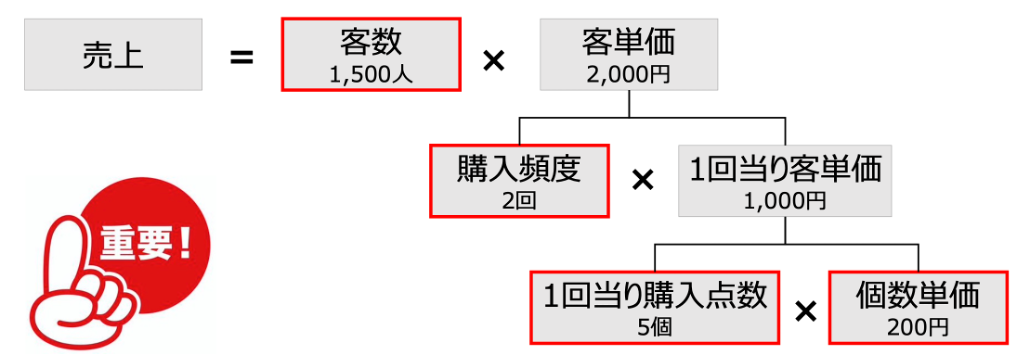

店舗別の売上因数分解

In [83]:
# 店舗別の売上因数分解
# 手順①

factor = df.groupby('店舗名').agg(
    val = ('金額', 'sum'),
    vol = ('個数', 'sum'),
    man = ('顧客ID', 'nunique'),
    receipt = ('レシート', 'nunique'),
)

factor.head()


,val,vol,man,receipt
店舗名,,,,
ＳＤ一枝薬局,637077513,1974273,21781,302543
ＳＤ千代ヶ崎,563241208,1682663,17826,277314
ＳＤ朝日ヶ丘店,175396620,348903,13084,110532
ＳＤ桜町薬局,303540671,1043638,7877,160718


In [84]:
# 手順②

factor['客単価'] = factor['val'] / factor['man']
factor['購入頻度'] = factor['receipt'] / factor['man']
factor['1回当り客単価']= factor['val'] / factor['receipt']
factor['1回当り購入点数']= factor['vol'] / factor['receipt']
factor['個数単価'] = factor['val'] / factor['vol']

factor.head()


,val,vol,man,receipt,客単価,購入頻度,1回当り客単価,1回当り購入点数,個数単価
店舗名,,,,,,,,,
ＳＤ一枝薬局,637077513,1974273,21781,302543,29249.231578,13.890225,2105.742037,6.525595,322.689675
ＳＤ千代ヶ崎,563241208,1682663,17826,277314,31596.612140,15.556715,2031.059406,6.067717,334.732034
ＳＤ朝日ヶ丘店,175396620,348903,13084,110532,13405.428004,8.447875,1586.840191,3.156579,502.708833
ＳＤ桜町薬局,303540671,1043638,7877,160718,38535.060429,20.403453,1888.653860,6.493597,290.848619


In [85]:
# 手順③みやすいようにカンマ編集、小数点２桁設定()

factor['客単価'] = factor['客単価'].apply('{:,.0f}'.format)
factor['購入頻度'] = factor['購入頻度'].apply('{:.2f}'.format)
factor['val'] = factor['val'].apply('{:,.0f}'.format)
factor['man'] = factor['man'].apply('{:,.0f}'.format)
factor['1回当り客単価'] = factor['1回当り客単価'].apply('{:,.0f}'.format)
factor['1回当り購入点数'] = factor['1回当り購入点数'].apply('{:.2f}'.format)
factor['個数単価'] = factor['個数単価'].apply('{:,.0f}'.format)

factor.head()


,val,vol,man,receipt,客単価,購入頻度,1回当り客単価,1回当り購入点数,個数単価
店舗名,,,,,,,,,
ＳＤ一枝薬局,"637,077,513",1974273,"21,781",302543,"29,249",13.89,"2,106",6.53,323
ＳＤ千代ヶ崎,"563,241,208",1682663,"17,826",277314,"31,597",15.56,"2,031",6.07,335
ＳＤ朝日ヶ丘店,"175,396,620",348903,"13,084",110532,"13,405",8.45,"1,587",3.16,503
ＳＤ桜町薬局,"303,540,671",1043638,"7,877",160718,"38,535",20.40,"1,889",6.49,291


In [86]:
# 手順④　売上の因数分解で必要な項目だけを表示する

factor = factor.rename(columns = {'val': '売上', 'man': '客数'})
factor[['売上', '客数', '客単価', '購入頻度', '1回当り客単価', '1回当り購入点数','個数単価']]

,売上,客数,客単価,購入頻度,1回当り客単価,1回当り購入点数,個数単価
店舗名,,,,,,,
ＳＤ一枝薬局,"637,077,513","21,781","29,249",13.89,"2,106",6.53,323
ＳＤ千代ヶ崎,"563,241,208","17,826","31,597",15.56,"2,031",6.07,335
ＳＤ朝日ヶ丘店,"175,396,620","13,084","13,405",8.45,"1,587",3.16,503
ＳＤ桜町薬局,"303,540,671","7,877","38,535",20.40,"1,889",6.49,291


#### 自動化をするための関数をつくる<難易度：高>

売上の因数分解の関数をつくり、自動化する

In [87]:
# insuという名前の関数を作成する

def insu(df_name, col):  #　insuという関数をつくる。
    factor = df_name.groupby(col).agg(
        val = ('金額', 'sum'),
        vol = ('個数', 'sum'),
        man = ('顧客ID', 'nunique'),
        receipt = ('レシート', 'nunique'),
    )

    factor['客単価'] = (factor['val'] / factor['man'])
    factor['購入頻度'] = factor['receipt'] / factor['man']
    factor['1回当り客単価']= factor['val'] / factor['receipt']
    factor['1回当り購入点数']= factor['vol'] / factor['receipt']
    factor['個数単価'] = factor['val'] / factor['vol']

    # みやすいようにカンマ編集、小数点２桁設定（ただし、指定をすると、数字が文字列になるためその後の計算ができないので注意）
    factor['客単価'] = factor['客単価'].apply('{:,.0f}'.format)
    factor['購入頻度'] = factor['購入頻度'].apply('{:.2f}'.format)
    factor['val'] = factor['val'].apply('{:,.0f}'.format)
    factor['man'] = factor['man'].apply('{:,.0f}'.format)
    factor['1回当り客単価'] = factor['1回当り客単価'].apply('{:,.0f}'.format)
    factor['1回当り購入点数'] = factor['1回当り購入点数'].apply('{:.2f}'.format)
    factor['個数単価'] = factor['個数単価'].apply('{:,.0f}'.format)

    factor = factor.rename(columns = {'val': '売上', 'man': '客数'})
    output = factor[['売上', '客数', '客単価', '購入頻度', '1回当り客単価', '1回当り購入点数','個数単価']]
    return output


因数分解の関数を定義しておくと、引数(カッコの中)を設定するだけで、因数分解をしてくれる


In [88]:
# insu()の中に、2つの引数（データ期間, 集計したい項目）を入れる
# データ期間は、df1 または df2

# df1(20.4-21.3)の因数分解
insu(df1, '店舗名')

,売上,客数,客単価,購入頻度,1回当り客単価,1回当り購入点数,個数単価
店舗名,,,,,,,
ＳＤ一枝薬局,"624,929,966","21,266","29,386",13.84,"2,124",6.66,319
ＳＤ千代ヶ崎,"582,456,623","18,354","31,735",15.75,"2,015",6.13,329
ＳＤ朝日ヶ丘店,"186,082,073","13,762","13,521",8.70,"1,555",3.25,478
ＳＤ桜町薬局,"328,292,210","8,280","39,649",20.82,"1,905",6.59,289


In [89]:
# 21.4-22.3の因数分解
insu(df2, '店舗名')

,売上,客数,客単価,購入頻度,1回当り客単価,1回当り購入点数,個数単価
店舗名,,,,,,,
ＳＤ一枝薬局,"637,077,513","21,781","29,249",13.89,"2,106",6.53,323
ＳＤ千代ヶ崎,"563,241,208","17,826","31,597",15.56,"2,031",6.07,335
ＳＤ朝日ヶ丘店,"175,396,620","13,084","13,405",8.45,"1,587",3.16,503
ＳＤ桜町薬局,"303,540,671","7,877","38,535",20.40,"1,889",6.49,291


In [90]:
insu(df2, '大分類名')

,売上,客数,客単価,購入頻度,1回当り客単価,1回当り購入点数,個数単価
大分類名,,,,,,,
不明,"170,779,546","25,732","6,637",5.89,"1,128",1.58,715
文化用品,"3,344,814","6,395",523,1.85,282,1.44,197
日用品,"957,943,789","48,576","19,721",12.39,"1,592",3.06,520
有料レジ袋,"601,947","20,594",29,7.20,4,1.12,4
耐久消費財,"6,842,336","6,238","1,097",1.71,640,1.18,542
衣料・身回り品,"11,317,189","7,181","1,576",1.94,811,1.42,570
食 品,"528,426,391","39,944","13,229",13.17,"1,004",5.23,192


＜練習＞関数を使って、因数分解を出してみよう

In [92]:
# 例：品目別の因数分解をして売上上位20カテゴリーを出す
insu(df2, '品目名').sort_values('売上', ascending = False).head(20)

# なんか変！
# カンマ編集をすると、数字が文字列扱いになるので、正しくソートしてくれない

,売上,客数,客単価,購入頻度,1回当り客単価,1回当り購入点数,個数単価
品目名,,,,,,,
ビタミンＢ２主薬製剤,"989,276",490,"2,019",1.60,"1,262",1.02,"1,238"
ホイップクリーム,"98,461",377,261,1.36,192,1.08,177
小動物フード,"98,311",63,"1,560",2.84,549,1.31,418
光ディスク,"98,304",56,"1,755",1.50,"1,170",1.06,"1,105"
ネクタイ,979,1,979,1.00,979,1.00,979
その他乳飲料,"971,074","2,115",459,2.48,185,1.54,120
菓子セット,"97,469",257,379,1.45,262,1.02,257
男性白髪用カラーリング剤,"969,724",712,"1,362",1.81,753,1.03,731
魔法瓶・ジャー,"96,621",180,537,1.06,506,1.07,474


### 2つのデータフレームをMerge（マージ）する

Mergeとは2つのDFを結合すること

> ここでやろうとしていることは、insu()で2期間（当期・前期）の因数分解を行い、それぞれのデータを結合すること

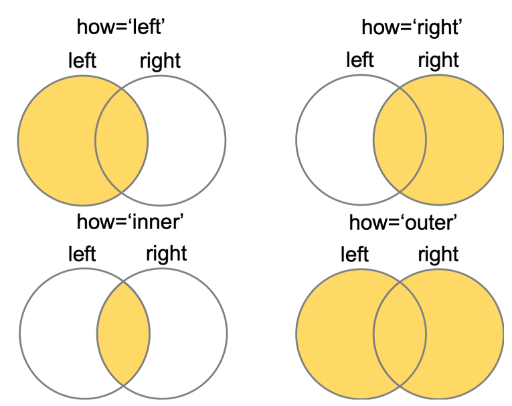



In [93]:
# ここでは当期（ty）がleft  前期(ly)がright
# ty.merge()カッコ内のhow=を省略はinner 
# 当期・前期共に品目名が出現している（つまり購買があった）ものを結合している。

ly = insu(df1, ['店舗名','大分類名','中分類名','小分類名','品目名']) #前期
ty = insu(df2, ['店舗名','大分類名','中分類名','小分類名','品目名']) #当期

#2期間をマージする。　
factor_comp = ly.merge(ty, on = ['店舗名','大分類名','中分類名','小分類名','品目名'])
factor_comp

# 前期: _x  当期: _y   　
# 項目名が2つ出てくるため、_x _yで自動的に区別される

売上_x    客数_x  客単価_x  \
店舗名    大分類名 中分類名         小分類名   品目名                                        
ＳＤ一枝薬局 不明   不明           不明     不明             39,022,619  12,340  3,162   
       文化用品 その他文化用品      宗教用具   宗教用具一般             14,696      18    816   
            情報機器         デジタル型  補助記憶装置             25,374      18  1,410   
                         有線通信装置 有線通信機器用部品・附属品      65,658      45  1,459   
            文具・事務用品・情報文具 オフィス家具 黒板・ホワイトボード          2,707      10    271   
...                                                   ...     ...    ...   
ＳＤ桜町薬局 食　品  飲料・酒類        清涼飲料   栄養ドリンク          1,109,635   1,041  1,066   
                                水                 812,382   1,056    769   
                                炭酸フレーバー         2,464,187   2,207  1,117   
                                炭酸水               451,577     669    675   
                                紅茶ドリンク            372,689     841    443   

                                              購入頻度_x 1回当り客単価_x 1回当り購入点数_x  \
店舗名    大分類名 中分類名         小分類名   品目名                                         
ＳＤ一枝薬局 不明   不明           不明     不明              5.35       591       1.49   
       文化用品 その他文化用品      宗教用具   宗教用具一般          1.00       816       1.00   
            情報機器         デジタル型  補助記憶装置          1.17     1,208       1.14   
                         有線通信装置 有線通信機器用部品・附属品   1.20     1,216       1.06   
            文具・事務用品・情報文具 オフィス家具 黒板・ホワイトボード      1.00       271       1.50   
...                                              ...       ...        ...   
ＳＤ桜町薬局 食　品  飲料・酒類        清涼飲料   栄養ドリンク          2.87       371       1.56   
                                水               3.74       206       1.60   
                                炭酸フレーバー         4.86       230       1.66   
                                炭酸水             3.43       197       2.22   
                                紅茶ドリンク          3.29       135       1.34   

                                              個数単価_x        売上_y    客数_y  \
店舗名    大分類名 中分類名         小分類名   品目名                                        
ＳＤ一枝薬局 不明   不明           不明     不明               397  46,179,824  10,536   
       文化用品 その他文化用品      宗教用具   宗教用具一般           816      11,338      11   
            情報機器         デジタル型  補助記憶装置         1,057      13,573      13   
                         有線通信装置 有線通信機器用部品・附属品  1,152      54,878      41   
            文具・事務用品・情報文具 オフィス家具 黒板・ホワイトボード       180         892       4   
...                                              ...         ...     ...   
ＳＤ桜町薬局 食　品  飲料・酒類        清涼飲料   栄養ドリンク           238     968,433     832   
                                水                128     825,644   1,173   
                                炭酸フレーバー          139   2,334,794   2,091   
                                炭酸水               89     306,989     614   
                                紅茶ドリンク           101     352,341     852   

                                               客単価_y 購入頻度_y 1回当り客単価_y  \
店舗名    大分類名 中分類名         小分類名   品目名                                     
ＳＤ一枝薬局 不明   不明           不明     不明             4,383   5.59       784   
       文化用品 その他文化用品      宗教用具   宗教用具一般         1,031   1.09       945   
            情報機器         デジタル型  補助記憶装置         1,044   1.08       970   
                         有線通信装置 有線通信機器用部品・附属品  1,338   1.24     1,076   
            文具・事務用品・情報文具 オフィス家具 黒板・ホワイトボード       223   1.00       223   
...                                              ...    ...       ...   
ＳＤ桜町薬局 食　品  飲料・酒類        清涼飲料   栄養ドリンク         1,164   2.89       402   
                                水                704   4.17       169   
                                炭酸フレーバー        1,117   4.74       236   
                                炭酸水              500   3.18       157   
                                紅茶ドリンク           414   3.22       128   

                                              1回当り購入点数_y 個数単価_y  
店舗名    大分類名 中分類名         小分類名   品目名                      

結合したデータフレームをCSVに保管する

In [ ]:
# CSV保管しておく
factor_comp.to_csv('/content/drive/MyDrive/メディア調査実習入門/品目別売上因数分解前後比.csv', encoding = 'cp932')

### 年代分析

pivot_tableを使って店舗別に年代人数を出す

In [94]:
age = df.pivot_table(index = '店舗名', columns = '年代区分', values = '顧客ID', aggfunc = 'nunique')
age

年代区分,10代,20代,30代,40代,50代,60代,70代,80代,90代,不明
店舗名,,,,,,,,,,
ＳＤ一枝薬局,169,1382,3543,4577,4491,3414,2478,895,129,703
ＳＤ千代ヶ崎,96,1530,2319,3185,3250,2952,2622,1020,112,740
ＳＤ朝日ヶ丘店,71,712,1618,2440,2682,2213,1962,904,138,344
ＳＤ桜町薬局,32,385,950,1339,1574,1398,1206,551,91,351


#### 年代別の構成比を出す＜難易度：高＞

In [95]:
# lambda式で　各セルを横合計で割って構成比を出す＜難易度：高＞
age_cont = age.apply(lambda x: x/sum(x), axis = 1)
age_cont


年代区分,10代,20代,30代,40代,50代,60代,70代,80代,90代,不明
店舗名,,,,,,,,,,
ＳＤ一枝薬局,0.007759,0.063450,0.162665,0.210137,0.206189,0.156742,0.113769,0.041091,0.005923,0.032276
ＳＤ千代ヶ崎,0.005385,0.085830,0.130091,0.178672,0.182318,0.165601,0.147089,0.057220,0.006283,0.041512
ＳＤ朝日ヶ丘店,0.005426,0.054418,0.123662,0.186487,0.204983,0.169138,0.149954,0.069092,0.010547,0.026292
ＳＤ桜町薬局,0.004062,0.048876,0.120604,0.169989,0.199822,0.177479,0.153104,0.069950,0.011553,0.044560


In [96]:
# 小数点3桁まで表示＜難易度：高＞
# applymapは、データフレームの全ての要素に対して適用される

age_cont.applymap('{:.3f}'.format)


年代区分,10代,20代,30代,40代,50代,60代,70代,80代,90代,不明
店舗名,,,,,,,,,,
ＳＤ一枝薬局,0.008,0.063,0.163,0.210,0.206,0.157,0.114,0.041,0.006,0.032
ＳＤ千代ヶ崎,0.005,0.086,0.130,0.179,0.182,0.166,0.147,0.057,0.006,0.042
ＳＤ朝日ヶ丘店,0.005,0.054,0.124,0.186,0.205,0.169,0.150,0.069,0.011,0.026
ＳＤ桜町薬局,0.004,0.049,0.121,0.170,0.200,0.177,0.153,0.070,0.012,0.045


### ★実践編＜まとめ＞

* 売上の因数分解は4つの因子（金額・個数・客数・レシート数）のみでできている
* 関数を使って売上因数分解を出す
* 年代分析

##  5.グラフ


---



###  棒グラフ

年代別の購入者数を棒グラフで表示する

In [97]:
# id_age2 = df[['顧客ID', '年代区分']].groupby('年代区分').nunique()
id_age2 = df.groupby('年代区分').nunique()
id_age2



,顧客ID,生年,性別,購入日,店舗名,JAN,商品名,大分類名,中分類名,小分類名,品目名,個数,金額,レシート,年,月,年齢
年代区分,,,,,,,,,,,,,,,,,
10代,350,10,2,364,4,4375,4359,7,21,109,411,15,751,2540,2,12,10
20代,3644,10,2,365,4,21256,21113,7,26,162,617,32,2311,50479,2,12,10
30代,7011,10,3,365,4,28254,28035,7,27,176,674,45,3432,108339,2,12,10
40代,9679,10,3,365,4,31236,30981,7,27,174,680,54,4220,151925,2,12,10
50代,10092,10,3,365,4,31256,30985,7,26,177,678,47,4744,155237,2,12,10
60代,8733,10,3,365,4,30046,29784,7,26,175,683,53,4953,152096,2,12,10
70代,7589,10,3,365,4,27099,26872,7,26,172,660,57,4679,133394,2,12,10
80代,3174,10,2,365,4,19401,19268,7,26,159,627,41,3263,60843,2,12,10
90代,446,10,2,365,4,7491,7455,7,24,130,536,28,1560,7999,2,12,10


<BarContainer object of 10 artists>

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 20195 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 19981 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 26126 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 20195 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 19981 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 26126 missing from current font.
  font.set_text

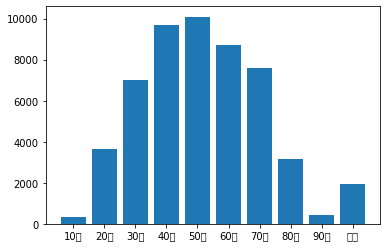

In [99]:
# 棒グラフはbarをつかう

x = id_age2.index
y = id_age2['顧客ID']

plt.bar(x, y) #棒グラフ

# 日本語が文字化けしている

#### グラフの文字化けをなくす

In [100]:
# 日本語でグラフ表記するためのライブラリをインポートする
!pip install japanize-matplotlib
import japanize_matplotlib


     |████████████████████████████████| 4.1 MB 5.2 MB/s 
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120275 sha256=600a59963bf8e946ae8540251fcc7d98193af427d7f4b23b18189c0a784031b3
  Stored in directory: /root/.cache/pip/wheels/83/97/6b/e9e0cde099cc40f972b8dd23367308f7705ae06cd6d4714658
Successfully built japanize-matplotlib


<BarContainer object of 10 artists>

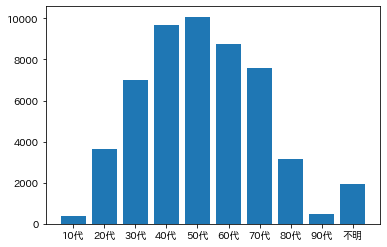

In [104]:
x = id_age2.index
y = id_age2['顧客ID']

plt.bar(x, y) #棒グラフ


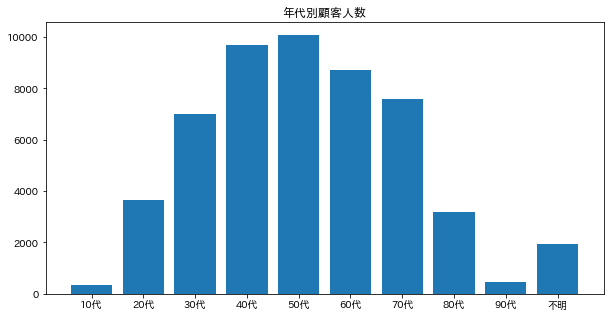

In [102]:
# グラフを加工してみる

x = id_age2.index
y = id_age2['顧客ID']

plt.figure(figsize=(10,5)) #グラフのサイズ
plt.title('年代別顧客人数') #グラフのタイトル
plt.bar(x, y) #棒グラフ
plt.show()

＜練習＞　年代別購入金額を出してみよう

In [ ]:
# groupbyで年代別の合計を出す。 .sum()



In [ ]:
# x：　年代別（インデックス）、y:金額を指定する



### 折れ線グラフ

 棒グラフと同じ年代別人数を男女別で出してみる

In [ ]:
id_age3 = df.pivot_table(index ='年代区分', columns ='性別', values = '顧客ID', aggfunc = 'nunique')
id_age3


性別,不明,女性,男性
年代区分,,,
10代,0,262,88
20代,0,2711,933
30代,1,5715,1295
40代,1,7948,1730
50代,1,8103,1988
60代,4,6835,1894
70代,1,5954,1634
80代,0,2476,698
90代,0,344,102


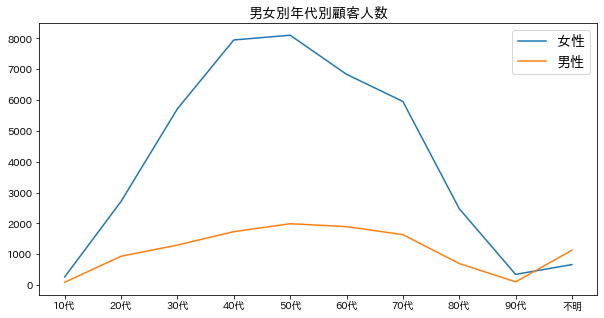

In [ ]:
# 折れ線グラフはplt.plot()をつかう
x = id_age3.index
y1 = id_age3['女性']
y2 = id_age3['男性']

plt.figure(figsize=(10,5)) #グラフのサイズ

plt.plot(x, y1) #女性　棒グラフ
plt.plot(x, y2) #男性　棒グラフ
plt.title('男女別年代別顧客人数', fontsize = 14) #グラフのタイトル
plt.legend(['女性', '男性'], fontsize = 14)
plt.show()

店舗別月別販売金額を折れ線グラフで表示する

In [ ]:
# pivot_tableで表側に年月、表頭に店舗を設定
df.pivot_table(index = ['年','月'], columns = '店舗名', values = '金額', aggfunc = 'sum')

店舗名        ＳＤ一枝薬局    ＳＤ千代ヶ崎   ＳＤ朝日ヶ丘店    ＳＤ桜町薬局
年    月                                         
2021 4   50287894  45452887  14132513  24970258
     5   55310653  47838932  15485058  27139089
     6   53487243  46278728  14177559  25417574
     7   56450677  49685826  15878321  26610836
     8   54748427  47181834  14848782  25644789
     9   52128134  47652810  14122485  25363508
     10  53933407  47339778  15321737  25517790
     11  51369815  45495396  13171240  23247184
     12  59335172  51766935  17202471  27411933
2022 1   51679122  44240167  14038262  24156334
     2   47863521  44318501  13274194  23574427
     3   50483448  45989414  13743998  24486949

In [ ]:
#reset_index()をつけて、'年','月'をcolumnsにする
df_ym = df.pivot_table(index = ['年','月'], columns = '店舗名', values = '金額', aggfunc = 'sum').reset_index()
df_ym

店舗名,年,月,ＳＤ一枝薬局,ＳＤ千代ヶ崎,ＳＤ朝日ヶ丘店,ＳＤ桜町薬局
0,2021,4,50287894,45452887,14132513,24970258
1,2021,5,55310653,47838932,15485058,27139089
2,2021,6,53487243,46278728,14177559,25417574
3,2021,7,56450677,49685826,15878321,26610836
4,2021,8,54748427,47181834,14848782,25644789
5,2021,9,52128134,47652810,14122485,25363508
6,2021,10,53933407,47339778,15321737,25517790
7,2021,11,51369815,45495396,13171240,23247184
8,2021,12,59335172,51766935,17202471,27411933
9,2022,1,51679122,44240167,14038262,24156334


In [ ]:
# 年月のフィールドをつくる
#年・月共に整数型のため、文字に置き換えてから結合する

df_ym['年月'] = df_ym['年'].astype(str) + '_' + df_ym['月'].astype(str)
df_ym

店舗名,年,月,ＳＤ一枝薬局,ＳＤ千代ヶ崎,ＳＤ朝日ヶ丘店,ＳＤ桜町薬局,年月
0,2021,4,50287894,45452887,14132513,24970258,2021_4
1,2021,5,55310653,47838932,15485058,27139089,2021_5
2,2021,6,53487243,46278728,14177559,25417574,2021_6
3,2021,7,56450677,49685826,15878321,26610836,2021_7
4,2021,8,54748427,47181834,14848782,25644789,2021_8
5,2021,9,52128134,47652810,14122485,25363508,2021_9
6,2021,10,53933407,47339778,15321737,25517790,2021_10
7,2021,11,51369815,45495396,13171240,23247184,2021_11
8,2021,12,59335172,51766935,17202471,27411933,2021_12
9,2022,1,51679122,44240167,14038262,24156334,2022_1


#### ilocでデータフレームの抽出範囲を指定する＜難易度：中＞

```
データフレーム名.iloc[行,列]
「：」は全部。　
「2：6」は2番目から6番目の手前（5番目まで）
「2:-1」は2番目から最後の１つ手前まで　
```



In [ ]:
x = df_ym['年月']

# ilocで4店舗分のデータを抽出する
y = df_ym.iloc[:,2:6]

#-1としても良い
# y = df_ym.iloc[:,2:-1]

y

店舗名,ＳＤ一枝薬局,ＳＤ千代ヶ崎,ＳＤ朝日ヶ丘店,ＳＤ桜町薬局
0,50287894,45452887,14132513,24970258
1,55310653,47838932,15485058,27139089
2,53487243,46278728,14177559,25417574
3,56450677,49685826,15878321,26610836
4,54748427,47181834,14848782,25644789
5,52128134,47652810,14122485,25363508
6,53933407,47339778,15321737,25517790
7,51369815,45495396,13171240,23247184
8,59335172,51766935,17202471,27411933
9,51679122,44240167,14038262,24156334


Index(['ＳＤ一枝薬局', 'ＳＤ千代ヶ崎', 'ＳＤ朝日ヶ丘店', 'ＳＤ桜町薬局'], dtype='object', name='店舗名')


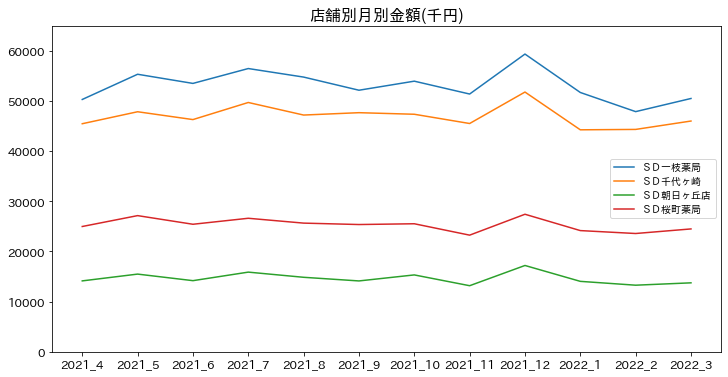

In [ ]:
# 店舗名を取り出す
store_name = y.columns
print(store_name)

plt.figure(figsize=(12,6))
plt.title('店舗別月別金額(千円)', size = 16)

plt.plot(x, y/1000)

plt.legend(store_name, loc='right', fontsize = 10) #凡例
plt.ylim(0,65000) #y軸の目盛りの範囲
plt.xticks(fontsize = 12) #x軸のフォントサイズ
plt.yticks(fontsize = 12) #y軸のフォントサイズ

plt.show()

### ヒストグラム

年齢別の度数分布を出す

In [ ]:
# mean（）は平均値。
id_age = df[['年齢', '顧客ID']].groupby('顧客ID').mean()
id_age

,年齢
顧客ID,
00014687f531b67978ecad8995e11d66,41.0
0004a04b9f5e48d3c3f512f0f248e687,74.0
0004dbad63c78fc90145e64ad3c8df06,60.0
000969e249c2562ffe58f67cff0eab58,57.0
0009cb64fe4df1b716f27594ebe2b9c7,85.0
...,...
fff7afd17d369e5de0e6428ceacc60f4,32.0
fff98cbfb7f21bab7482d4df53b85fc1,42.0
fffce63204834086505db70ae3c78a8e,24.0


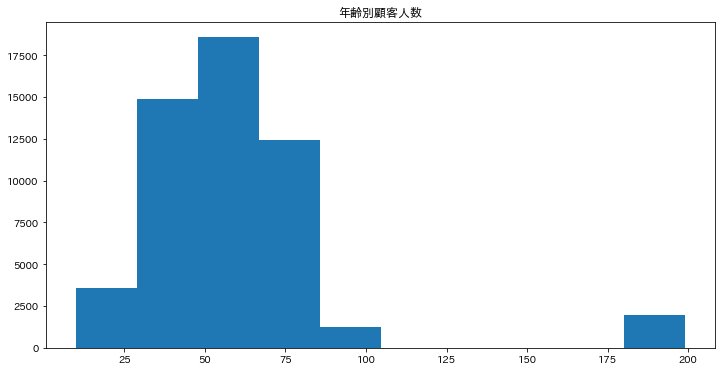

In [ ]:
# ヒストグラムは1軸だけ指定すれば良い
x = id_age['年齢']

plt.figure(figsize=(12,6))
plt.title('年齢別顧客人数')
plt.hist(x)
plt.show()

#不明を199歳に設定したので、わかりにくい

X軸の範囲を10-99歳にする

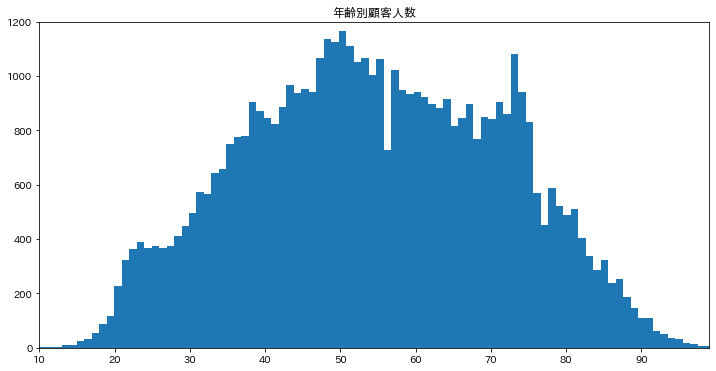

In [ ]:
# 99歳に絞って設定する
x = id_age['年齢']

plt.figure(figsize=(12,6))
plt.title('年齢別顧客人数')

# binsは分割数。　データは199歳まで含まれているので、1歳刻みでグラフを作る場合には、最大・最小の範囲で分割数を設定する＜難易度：中＞
plt.hist(x, bins = 190)

# x軸の範囲を10歳〜99歳までに設定
plt.xlim(10,99)
plt.ylim(0, 1200)
plt.show()

# 56歳が凹んでいる。

In [ ]:
age50 = df[df['年代区分'] =='50代']
print(age50.groupby('年齢').nunique()['顧客ID'])

age70 = df[df['年代区分'] =='70代']
print(age70.groupby('年齢').nunique()['顧客ID'])


年齢
50    1165
51    1110
52    1052
53    1068
54    1005
55    1062
56     726
57    1021
58     948
59     935
Name: 顧客ID, dtype: int64
年齢
70     841
71     904
72     862
73    1080
74     942
75     830
76     570
77     452
78     588
79     520
Name: 顧客ID, dtype: int64


### 散布図

日用雑貨購入者の購入回数と金額の散布図をつくる

In [ ]:
df_daily = df[df['中分類名'] == '日用雑貨']
id_age3 = df_daily.groupby('顧客ID').agg(
    val = ('金額', 'sum'), 
    freq = ('レシート', 'nunique'),
    )
id_age3.sort_values(by= 'val', ascending = False)

,val,freq
顧客ID,,
6dcd3c323c0f2f38182e03121883550b,480446,177
45d1a95c6e3f761b2d3304e871dcc7df,393483,94
2c3f3d853e1be48ec768601b759546d0,352588,60
3612a414aa7ed7ab28548fe2cdd1ebf8,318114,40
ba4b113e2f7363c49a330f78d3ee13cd,293486,129
...,...,...
76f450b95cfc97fb66412516574391cf,0,2
06028b7bec652946baf1c6582ea9303b,0,2
d67c3def52d257e8f7dd057fee05bffd,0,2


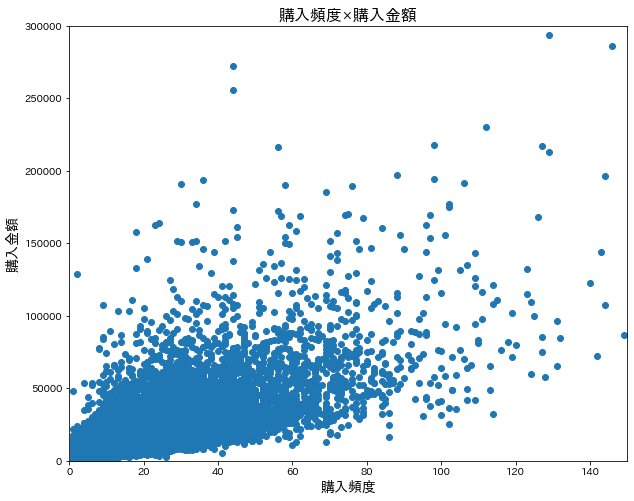

In [ ]:
x = id_age3['freq']
y = id_age3['val']

plt.figure(figsize=(10,8))

plt.title('購入頻度×購入金額',size = 16)
plt.xlabel('購入頻度', size = 14)
plt.ylabel('購入金額', size = 14)

plt.scatter(x, y) #散布図
plt.xlim(0,150)
plt.ylim(0,300000)
plt.show()

### ★グラフ＜まとめ＞
* 棒グラフ：plt.bar
* 折れ線グラフ:plt.plot
* ヒストグラム：plt.hist
* 散布図：plt.scatter

ヒストグラムは1軸だけ指定する。他はｘ・ｙの2軸を設定。

## ６. ＜参考＞時系列分析


---



In [ ]:
df.head(2)

,顧客ID,生年,性別,購入日,店舗名,JAN,商品名,大分類名,中分類名,小分類名,品目名,個数,金額,レシート,年,月,年齢,年代区分
0,bd6fd4c5d437c277e8e529fde4052491,1955,女性,2021-04-30,ＳＤ一枝薬局,4902581022524,フンドーキン あまくておいしい醤油 ２００ｍｌ,食品,加工食品,調味料,醤油,1,228,20210430_153_1035915,2021,4,67,60代
1,99792bc3da7aaa4cfb3b1f2b02c1c26f,1959,女性,2021-04-30,ＳＤ一枝薬局,4974507740096,チョーコー 特選 かけ醤油 瓶 ４００ｍｌ,食品,加工食品,調味料,醤油,1,399,20210430_153_1035682,2021,4,63,60代


### インデックス設定

日付をインデックスに設定することで、時系列の計算が容易にできる

In [ ]:
# 購入日をIndexに設定する

df_idx = df.set_index('購入日')
df_idx.head(2)

,顧客ID,生年,性別,店舗名,JAN,商品名,大分類名,中分類名,小分類名,品目名,個数,金額,レシート,年,月,年齢,年代区分
購入日,,,,,,,,,,,,,,,,,
2021-04-30,bd6fd4c5d437c277e8e529fde4052491,1955,女性,ＳＤ一枝薬局,4902581022524,フンドーキン あまくておいしい醤油 ２００ｍｌ,食品,加工食品,調味料,醤油,1,228,20210430_153_1035915,2021,4,67,60代
2021-04-30,99792bc3da7aaa4cfb3b1f2b02c1c26f,1959,女性,ＳＤ一枝薬局,4974507740096,チョーコー 特選 かけ醤油 瓶 ４００ｍｌ,食品,加工食品,調味料,醤油,1,399,20210430_153_1035682,2021,4,63,60代


項目名（カラム）を確認してみる

In [ ]:
df.columns

Index(['顧客ID', '生年', '性別', '購入日', '店舗名', 'JAN', '商品名', '大分類名', '中分類名', '小分類名',
       '品目名', '個数', '金額', 'レシート', '年', '月', '年齢', '年代区分'],
      dtype='object')

In [ ]:
df_idx.columns
# 購入日がカラムに出てこない

Index(['顧客ID', '生年', '性別', '店舗名', 'JAN', '商品名', '大分類名', '中分類名', '小分類名', '品目名',
       '個数', '金額', 'レシート', '年', '月', '年齢', '年代区分'],
      dtype='object')

### 時系列分析のデータ抽出

月を抽出

In [ ]:
# []で期間を設定。　

# 月まででもOK、2022年を出す場合はdf_idx['2022']でOK
df_idx['2021-11']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  after removing the cwd from sys.path.


,顧客ID,生年,性別,店舗名,JAN,商品名,大分類名,中分類名,小分類名,品目名,個数,金額,レシート,年,月,年齢,年代区分
購入日,,,,,,,,,,,,,,,,,
2021-11-30,d474495c2b50b036b4208c98e09da412,1999,女性,ＳＤ一枝薬局,4902412111700,富士甚 うまくち 富士 １ｌ,食品,加工食品,調味料,醤油,1,229,20211130_153_1165030,2021,11,23,20代
2021-11-30,725cf1cd9b6b08074a1e3a50f6edc920,1989,女性,ＳＤ桜町薬局,49788105,フンドーキン さしみしょうゆ 甘口 ３６０ｍｌ,食品,加工食品,調味料,醤油,1,258,20211130_143_772305,2021,11,33,30代
2021-11-29,7fdb9f0d298b5014e1bbe72fb00ba9c6,1966,女性,ＳＤ一枝薬局,4901515122514,いつでも新鮮 味わいリッチ減塩しょうゆ ４５０ｍｌ,食品,加工食品,調味料,醤油,1,248,20211129_153_383475,2021,11,56,50代
2021-11-29,8cda3163af35cd54252694cd80e4ef92,1993,男性,ＳＤ一枝薬局,4902970112232,宮島 本醸造ばらあまくち醤油 １Ｌ,食品,加工食品,調味料,醤油,1,228,20211129_153_1164285,2021,11,29,20代
2021-11-29,51f1982d9ad1fcb34032343bff437d4e,1981,男性,ＳＤ一枝薬局,4571188510118,ナカマル 宗像うまくち醤油 ３６０ｍｌ,食品,加工食品,調味料,醤油,1,328,20211129_153_1164260,2021,11,41,40代
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-30,ed81b83017b380d714858724dbc46387,1988,女性,ＳＤ一枝薬局,2800000000028,ご相談ポイント（調剤）,不明,不明,不明,不明,1,0,20211130_153_186716,2021,11,34,30代
2021-11-30,9e376d401a965ee7f2a485e5575b8601,1985,女性,ＳＤ一枝薬局,2800000000028,ご相談ポイント（調剤）,不明,不明,不明,不明,1,0,20211130_153_186724,2021,11,37,30代
2021-11-30,d18ca8bef99b5450a5113de2028c8af3,1989,女性,ＳＤ一枝薬局,2800000000028,ご相談ポイント（調剤）,不明,不明,不明,不明,1,0,20211130_153_186732,2021,11,33,30代


日付の範囲指定

In [ ]:
# 範囲を指定する
df_idx['2022-01-21':'2022-01-31'].head(3)

,顧客ID,生年,性別,店舗名,JAN,商品名,大分類名,中分類名,小分類名,品目名,個数,金額,レシート,年,月,年齢,年代区分
購入日,,,,,,,,,,,,,,,,,
2022-01-31,3e5dfbb6a00e85d292706037d2834576,1942,女性,ＳＤ桜町薬局,4560164000125,大町 うまくち醤油 １Ｌ,食品,加工食品,調味料,醤油,1,399,20220131_143_783034,2022,1,80,80代
2022-01-31,9ee34ca489ba2de3f61e1bae40527c80,1958,女性,ＳＤ桜町薬局,4560164000125,大町 うまくち醤油 １Ｌ,食品,加工食品,調味料,醤油,1,498,20220131_143_783093,2022,1,64,60代
2022-01-31,c28d588eea11de70f4ec9ee2334c52af,1947,女性,ＳＤ桜町薬局,4902412111700,富士甚 うまくち 富士 １ｌ,食品,加工食品,調味料,醤油,2,456,20220131_143_254131,2022,1,75,70代


月別集計

In [ ]:
# 月別の集計
df_month = df_idx.resample('M').sum()
df_month

# 'M' の他に、’Q'：4半期、’Y'：年間　’D’：日次などが設定できる。
# 365Dで年間


,生年,個数,金額,年,月,年齢
購入日,,,,,,
2021-04-30,685565473,408582,134843552,705302727,1395948,20823208
2021-05-31,713121598,425768,145773732,733584601,1814905,21604135
2021-06-30,712583907,429114,139361104,733053078,2176308,21639180
2021-07-31,746311834,456210,148625660,767654619,2658873,22505410
2021-08-31,735635456,448078,142423832,756818017,2995816,22378723
2021-09-30,699079650,423771,139266937,719049569,3202101,21062991
2021-10-31,713587144,428882,142112712,733962528,3631680,21499818
2021-11-30,668281926,398453,133283635,687307743,3740913,20105889
2021-12-31,750762013,451126,155716511,772480767,4586724,22942662


### 2年分のデータを結合

データ量が多くなると、メモリー不足になりクラッシュするリスクがあるので、データを絞ってから結合しましょう。

In [ ]:
folder = '/content/drive/MyDrive/メディア調査実習入門/D39/'

df1 = pd.read_csv(folder + '39d2004-2103.csv', index_col = 0)
df2 = pd.read_csv(folder + '39d2104-2203.csv', index_col = 0)

In [ ]:
# データ量が多いので、絞る
df1_lmt = df1[df1['店舗名'] == 'ＳＤ桜町薬局']
df2_lmt = df2[df2['店舗名'] == 'ＳＤ桜町薬局']

df_lmt = pd.concat([df1_lmt, df2_lmt], ignore_index = True)

In [ ]:
# 購入日を日付型に変更し、インデックスに設定する
df_lmt['購入日'] = pd.to_datetime(df_lmt['購入日'])
df_lmt = df_lmt.set_index('購入日')

### 前年比

In [ ]:
# 月度で集計をした上で、成長率を出す
df_lmt_m = df_lmt[['個数','金額']].resample('M').sum()

df_lmt_m['金額前年比'] = df_lmt_m['金額'].pct_change(periods = 12)
df_lmt_m

,個数,金額,金額前年比
購入日,,,
2020-04-30,106571,30213829,NaN
2020-05-31,103901,32775027,NaN
2020-06-30,100689,28662841,NaN
2020-07-31,100619,28871823,NaN
2020-08-31,102178,28552546,NaN
2020-09-30,92257,25807812,NaN
2020-10-31,88637,25769769,NaN
2020-11-30,85570,24644736,NaN
2020-12-31,99011,29538097,NaN
